# Contratos (Comprasnet) x Empenhos de contratos (Tesouro Gerencial)

Cruzamento entre os dados de contratos do comprasnet com os empenhos, liquidações e pagamentos do tesouro gerencial.

## Metodologia de cruzamento
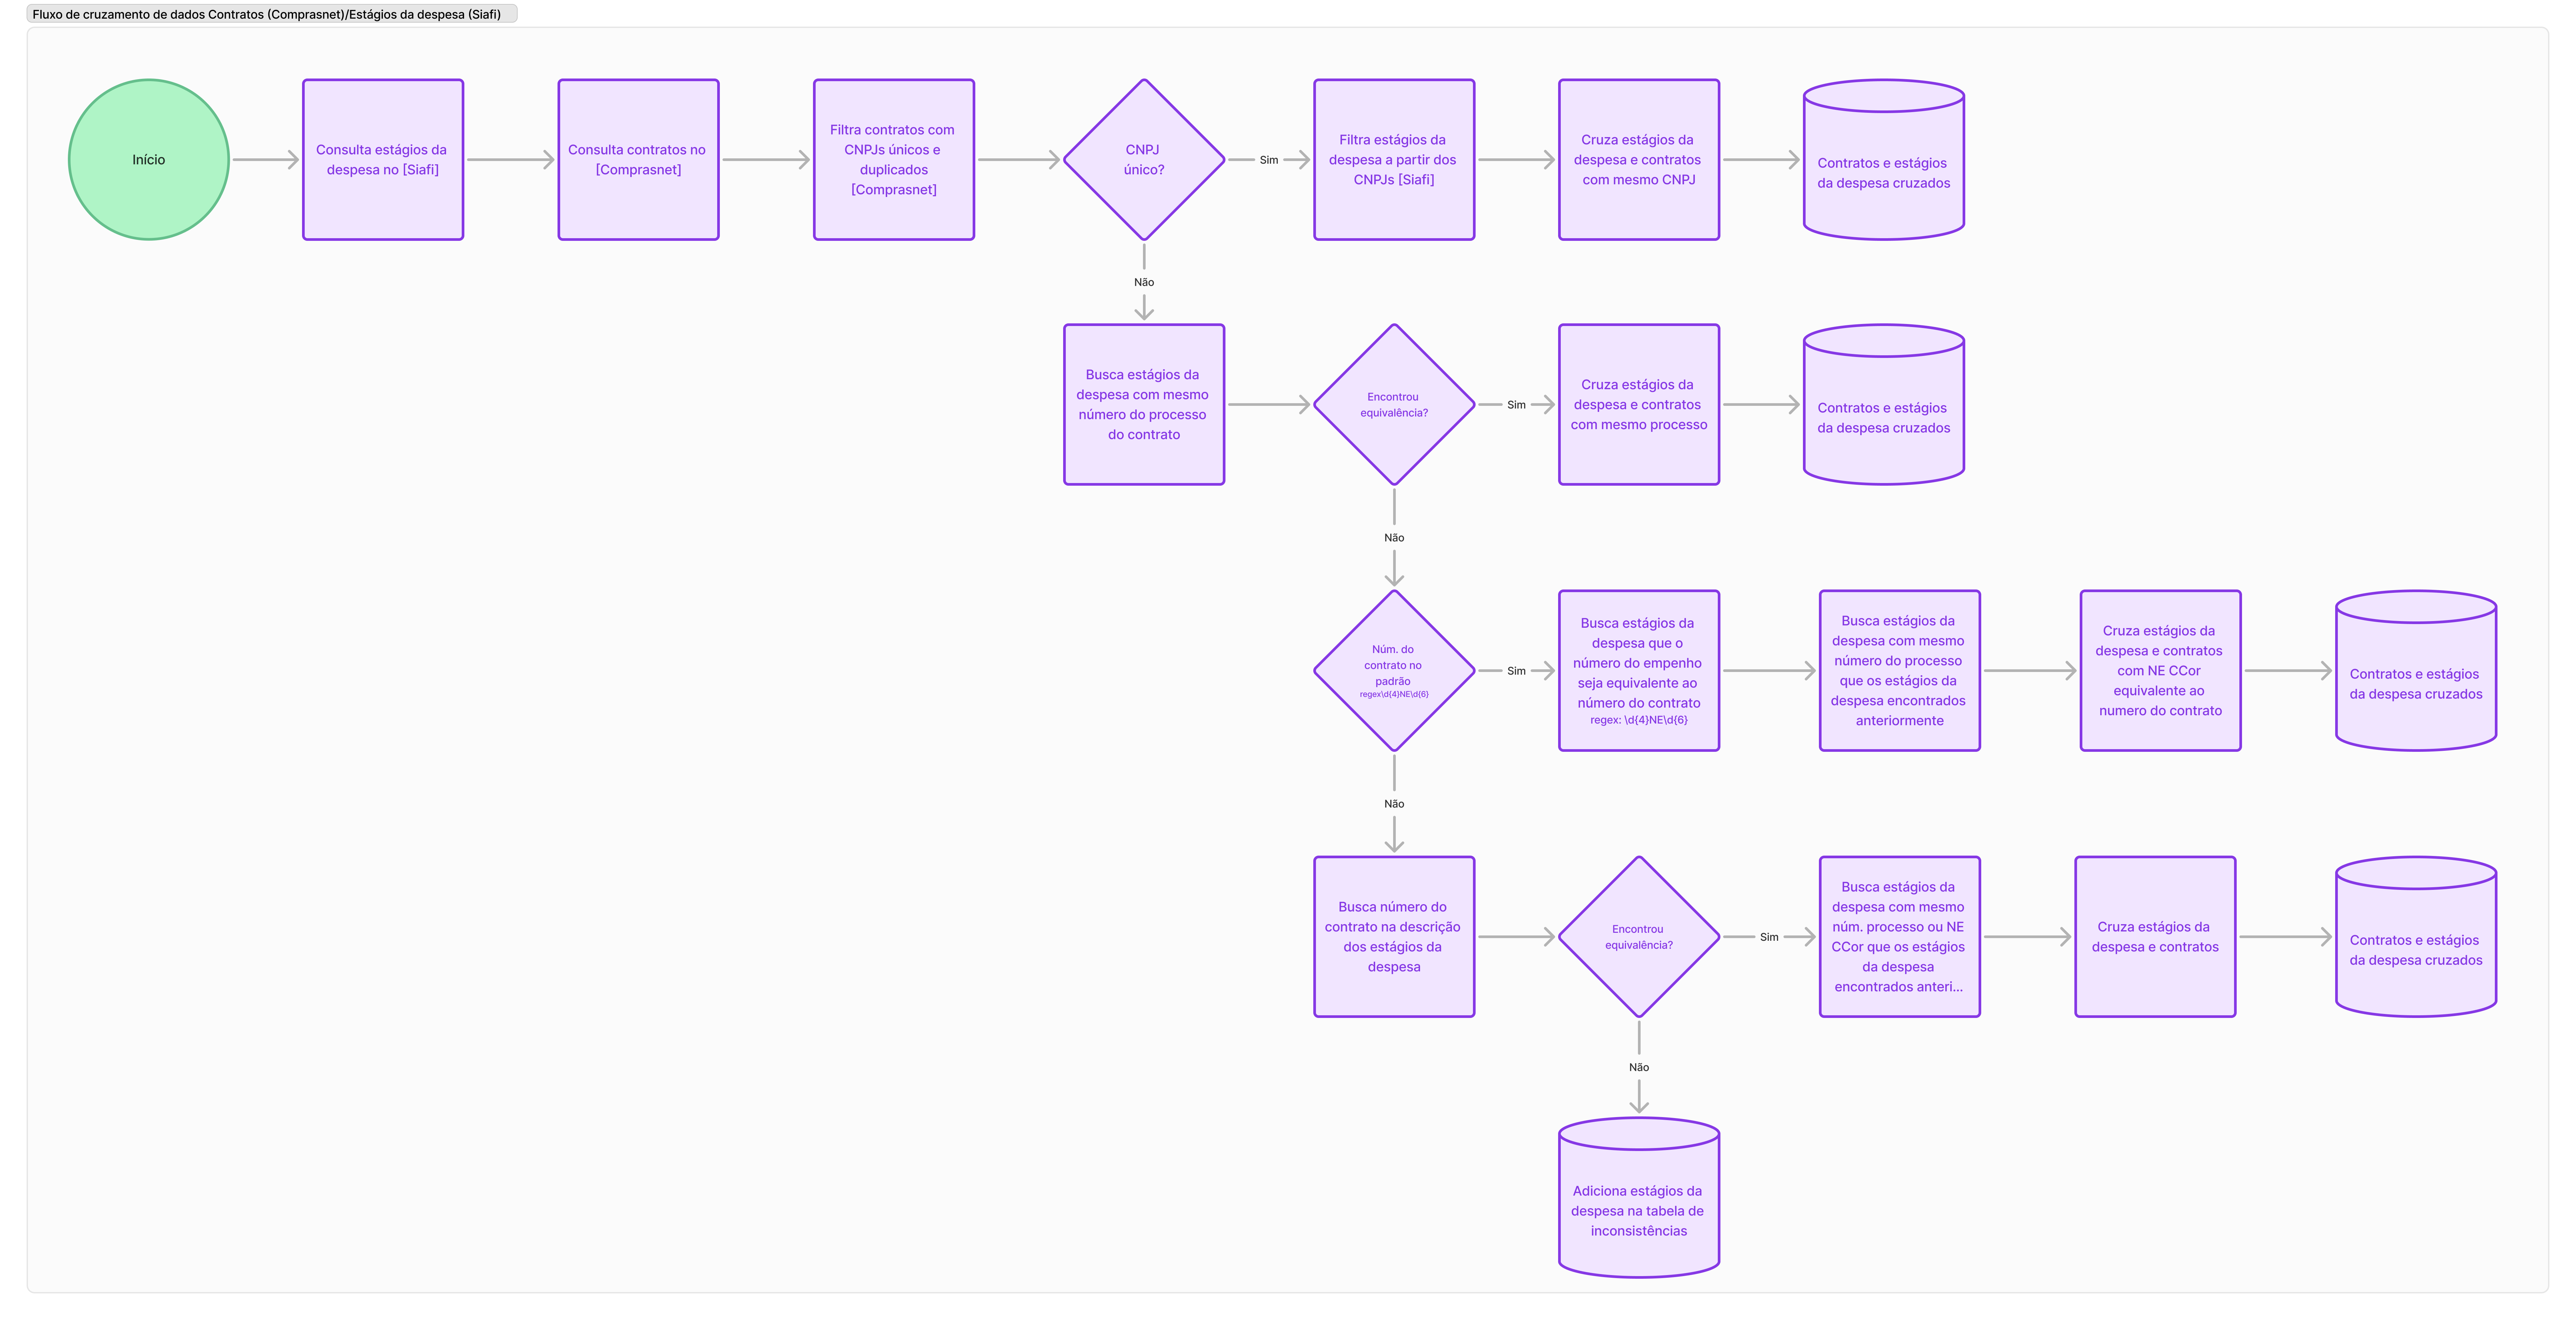

## Etapa 1 - Consulta estágios da despesa no tesouro gerencial

- Inserir informações do filtro utilizado !!
- Arquivo base: empenhos_contratos.csv 

### Modelo de consulta no Tesouro Gerencial

![alt text](image.png)

In [387]:
# inserir codigo que faz a leitura do arquivo do tesouro gerencial
# nomear o arquivo do tesouro gerencial como empenhos_contratos.csv e inserir na pasta base-dados/contratos-empenhos

In [388]:
# importar bibliotecas
import pandas as pd
import re
import os


In [389]:
# Definir as UGs do IPEA
ug1 = 113601
ug2 = 113602


# Verifique o diretório atual
print(os.getcwd())

# Ajuste o caminho para evitar duplicações
file_path = os.path.join('base-dados', 'Consulta NE  FAVORECIDO emp liq pag IPEA (14).xlsx')

# Carrega o arquivo
arquivo_tesouro = pd.read_excel(file_path)

# Exibe os primeiros dados para verificar
arquivo_tesouro.head()

/home/romul/data-mapping/notebooks


/home/romul/.local/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Consulta NE  FAVORECIDO emp liq pag IPEA  \
0                                      NaN   
1                                  NE CCor   
2                                      NaN   
3                                      NaN   
4                  113601113022020NE000018   

                                          Unnamed: 1  \
0                                                NaN   
1                                     NE - Descrição   
2                                                NaN   
3                                                NaN   
4  ANULACAO PARCIAL DO SALDO PARA AJUSTE NA PROGR...   

                                          Unnamed: 2               Unnamed: 3  \
0                                                NaN                      NaN   
1                                NE CCor - Descrição  NE CCor - Núm. Processo   
2                                                NaN                      NaN   
3                                                NaN                      NaN   
4  CONCESSAO DE DIARIAS NACIONAIS AOS COLABORADOR...                      '-8   

   Unnamed: 4 Unnamed: 5          Unnamed: 6            Unnamed: 7  \
0         NaN        NaN                 NaN                   NaN   
1  Doc - Tipo        NaN  NE - Núm. Processo  NE CCor - Favorecido   
2         NaN        NaN                 NaN                   NaN   
3         NaN        NaN                 NaN                   NaN   
4          NE    EMPENHO                 '-8             PF3903602   

                                  Unnamed: 8      Unnamed: 9     Unnamed: 10  \
0                                        NaN             NaN             NaN   
1                                        NaN  Ano Lançamento  Mês Lançamento   
2                                        NaN             NaN             NaN   
3                                        NaN             NaN             NaN   
4  DIARIAS A COLABORADORES EVENTUAIS NO PAIS            2020        JUL/2020   

        Unnamed: 11                                   Unnamed: 12  \
0               NaN                                           NaN   
1   Item Informação                                           NaN   
2               NaN                                           NaN   
3  Natureza Despesa                                           NaN   
4            339036  OUTROS SERVICOS DE TERCEIROS - PESSOA FISICA   

                              Unnamed: 13  \
0                                     NaN   
1                                      29   
2  DESPESAS EMPENHADAS (CONTROLE EMPENHO)   
3  Saldo - Moeda Origem (Item Informação)   
4                                 -100000   

                              Unnamed: 14  \
0                                     NaN   
1                                      29   
2  DESPESAS EMPENHADAS (CONTROLE EMPENHO)   
3   Movim. Líquido - R$ (Item Informação)   
4                                 -100000   

                              Unnamed: 15  \
0                                     NaN   
1                                      31   
2  DESPESAS LIQUIDADAS (CONTROLE EMPENHO)   
3  Saldo - Moeda Origem (Item Informação)   
4                                     NaN   

                              Unnamed: 16  \
0                                     NaN   
1                                      31   
2  DESPESAS LIQUIDADAS (CONTROLE EMPENHO)   
3   Movim. Líquido - R$ (Item Informação)   
4                                     NaN   

                              Unnamed: 17  \
0                                     NaN   
1                                      34   
2       DESPESAS PAGAS (CONTROLE EMPENHO)   
3  Saldo - Moeda Origem (Item Informação)   
4                                     NaN   

                             Unnamed: 18  
0                                    NaN  
1                                     34  
2      DESPESAS PAGAS (CONTROLE EMPENHO)  
3  Movim. Líquido - R$ (Item Informação)  
4             

In [390]:
# Passo 1: Remover as primeiras linhas que não fazem parte do cabeçalho real
arquivo_tesouro = arquivo_tesouro.drop([0, 1], axis=0).reset_index(drop=True)

# Passo 2: Renomear as colunas de acordo com o formato desejado
arquivo_tesouro.columns = [
    'NE_CCor', 'NE_Descricao','NE CCor - Descrição','NE CCor - Núm. Processo', 'Doc_Tipo', 'Tipo_Nome', 'NE_Num_Processo', 
    'NE_CCor_Favorecido', 'NE_CCor_Favorecido_Nome', 'Ano_Lancamento', 'Mes_Lancamento',
    'Natureza_Despesa', 'Natureza_Despesa_Nome', 
    'Despesas_Empenhadas_Saldo', 'Despesas_Empenhadas_Mov_Liquido',
    'Despesas_Liquidadas_Saldo', 'Despesas_Liquidadas_Mov_Liquido',
    'Despesas_Pagas_Saldo', 'Despesas_Pagas_Mov_Liquido'
]

# Passo 3: Garantir que as colunas numéricas estão formatadas corretamente
arquivo_tesouro['Despesas_Empenhadas_Saldo'] = pd.to_numeric(arquivo_tesouro['Despesas_Empenhadas_Saldo'], errors='coerce').fillna(0)
arquivo_tesouro['Despesas_Empenhadas_Mov_Liquido'] = pd.to_numeric(arquivo_tesouro['Despesas_Empenhadas_Mov_Liquido'], errors='coerce').fillna(0)
arquivo_tesouro['Despesas_Liquidadas_Saldo'] = pd.to_numeric(arquivo_tesouro['Despesas_Liquidadas_Saldo'], errors='coerce').fillna(0)
arquivo_tesouro['Despesas_Liquidadas_Mov_Liquido'] = pd.to_numeric(arquivo_tesouro['Despesas_Liquidadas_Mov_Liquido'], errors='coerce').fillna(0)
arquivo_tesouro['Despesas_Pagas_Saldo'] = pd.to_numeric(arquivo_tesouro['Despesas_Pagas_Saldo'], errors='coerce').fillna(0)
arquivo_tesouro['Despesas_Pagas_Mov_Liquido'] = pd.to_numeric(arquivo_tesouro['Despesas_Pagas_Mov_Liquido'], errors='coerce').fillna(0)
# Alternativamente, remover linhas onde as primeiras colunas são NaN
arquivo_tesouro = arquivo_tesouro.dropna(subset=['NE_CCor', 'NE_Descricao']).reset_index(drop=True)

#remove coluna totais para não dar erro na seleção
arquivo_tesouro = arquivo_tesouro.dropna(how='all').reset_index(drop=True)
arquivo_tesouro = arquivo_tesouro[arquivo_tesouro['NE_CCor'] != 'Total'] 


#melhora a visualização dos anos e ND
arquivo_tesouro['Natureza_Despesa'] = arquivo_tesouro['Natureza_Despesa'].astype(int) 
arquivo_tesouro['Ano_Lancamento'] = arquivo_tesouro['Ano_Lancamento'].astype(int)
#tesouro_ipea

#filtra pelos anos 2023 e 2024 para que possa fazer uma comparação mais precisa
arquivo_tesouro = arquivo_tesouro[(arquivo_tesouro['Ano_Lancamento'] == 2023) | (arquivo_tesouro['Ano_Lancamento'] == 2024)]


# Removendo espaços extras dos nomes das colunas
arquivo_tesouro.columns = arquivo_tesouro.columns.str.strip()

# Garantindo que as colunas de movimentação e saldo sejam numéricas e substituindo NaN por 0
arquivo_tesouro['Despesas_Empenhadas_Mov_Liquido'] = pd.to_numeric(arquivo_tesouro['Despesas_Empenhadas_Mov_Liquido'], errors='coerce').fillna(0)
arquivo_tesouro['Despesas_Liquidadas_Mov_Liquido'] = pd.to_numeric(arquivo_tesouro['Despesas_Liquidadas_Mov_Liquido'], errors='coerce').fillna(0)
arquivo_tesouro['Despesas_Pagas_Mov_Liquido'] = pd.to_numeric(arquivo_tesouro['Despesas_Pagas_Mov_Liquido'], errors='coerce').fillna(0)

arquivo_tesouro['Despesas_Empenhadas_Saldo'] = pd.to_numeric(arquivo_tesouro['Despesas_Empenhadas_Saldo'], errors='coerce').fillna(0)
arquivo_tesouro['Despesas_Liquidadas_Saldo'] = pd.to_numeric(arquivo_tesouro['Despesas_Liquidadas_Saldo'], errors='coerce').fillna(0)
arquivo_tesouro['Despesas_Pagas_Saldo'] = pd.to_numeric(arquivo_tesouro['Despesas_Pagas_Saldo'], errors='coerce').fillna(0)

# Filtrando as linhas onde qualquer uma das colunas de movimentação tenha valores maiores que 0
# e as colunas de saldo tenham valores maiores que 0 apenas para o mês de dezembro
tesouro_por_ano_movimento = arquivo_tesouro[
    (
        # Filtro para colunas de movimentação, independentemente do mês
        (arquivo_tesouro['Despesas_Empenhadas_Mov_Liquido'] > 0) |
        (arquivo_tesouro['Despesas_Liquidadas_Mov_Liquido'] > 0) |
        (arquivo_tesouro['Despesas_Pagas_Mov_Liquido'] > 0)
    ) |
    (
        # Filtro para colunas de saldo, apenas para o mês de dezembro
        (arquivo_tesouro['Mes_Lancamento'].str.startswith('DEZ')) & (
            (arquivo_tesouro['Despesas_Empenhadas_Saldo'] > 0) |
            (arquivo_tesouro['Despesas_Liquidadas_Saldo'] > 0) |
            (arquivo_tesouro['Despesas_Pagas_Saldo'] > 0)
        )
    )
]

# Criar uma nova coluna 'NE_CCor_reduzido' removendo os 11 primeiros dígitos da coluna 'NE_CCor'
tesouro_por_ano_movimento['NE_CCor_reduzido'] = tesouro_por_ano_movimento['NE_CCor'].apply(lambda x: str(x)[11:] if isinstance(x, str) else x)

# Exibindo o DataFrame filtrado
tesouro_por_ano_movimento.head()




/tmp/ipykernel_9779/2325016385.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesouro_por_ano_movimento['NE_CCor_reduzido'] = tesouro_por_ano_movimento['NE_CCor'].apply(lambda x: str(x)[11:] if isinstance(x, str) else x)


NE_CCor  \
12309  113601113022023NE000022   
12323  113601113022023NE000022   
12337  113601113022023NE000022   
12347  113601113022023NE000022   
12364  113601113022023NE000025   

                                            NE_Descricao  \
12309  FOLHA DE PAGAMENTO - VENCIMENTOS E VANTAGENS F...   
12323                                      NAO SE APLICA   
12337                                      NAO SE APLICA   
12347                                      NAO SE APLICA   
12364  CONTRATO ADMINISTRATIVO COM EMPRESA ESPECIALIZ...   

                                     NE CCor - Descrição  \
12309  FOLHA DE PAGAMENTO - VENCIMENTOS E VANTAGENS F...   
12323  FOLHA DE PAGAMENTO - VENCIMENTOS E VANTAGENS F...   
12337  FOLHA DE PAGAMENTO - VENCIMENTOS E VANTAGENS F...   
12347  FOLHA DE PAGAMENTO - VENCIMENTOS E VANTAGENS F...   
12364  CONTRATO ADMINISTRATIVO COM EMPRESA ESPECIALIZ...   

      NE CCor - Núm. Processo Doc_Tipo                   Tipo_Nome  \
12309      FOLHA DE PAGAMENTO       RO       REGISTRO ORCAMENTARIO   
12323      FOLHA DE PAGAMENTO       NS  NOTA DE LANCAMENTO SISTEMA   
12337      FOLHA DE PAGAMENTO       OB              ORDEM BANCARIA   
12347      FOLHA DE PAGAMENTO       OB              ORDEM BANCARIA   
12364    03001.002740/2019-87       RO       REGISTRO ORCAMENTARIO   

            NE_Num_Processo NE_CCor_Favorecido  \
12309    FOLHA DE PAGAMENTO          PF1131000   
12323                   '-9          PF1131000   
12337                   '-9          PF1131000   
12347                   '-9          PF1131000   
12364  03001.002740/2019-87     18090313000143   

                   NE_CCor_Favorecido_Nome  Ano_Lancamento Mes_Lancamento  \
12309  PAGAMENTO DE PESSOAL ATIVO DO IPEA.            2023       JAN/2023   
12323  PAGAMENTO DE PESSOAL ATIVO DO IPEA.            2023       JAN/2023   
12337  PAGAMENTO DE PESSOAL ATIVO DO IPEA.            2023       FEV/2023   
12347  PAGAMENTO DE PESSOAL ATIVO DO IPEA.            2023       DEZ/2023   
12364    DALA SERVICE AR CONDICIONADO LTDA            2023       JAN/2023   

       Natureza_Despesa                           Natureza_Despesa_Nome  \
12309            319092               DESPESAS DE EXERCICIOS ANTERIORES   
12323            319092               DESPESAS DE EXERCICIOS ANTERIORES   
12337            319092               DESPESAS DE EXERCICIOS ANTERIORES   
12347            319092               DESPESAS DE EXERCICIOS ANTERIORES   
12364            339039  OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA   

       Despesas_Empenhadas_Saldo  Despesas_Empenhadas_Mov_Liquido  \
12309                   10000.00                         10000.00   
12323                       0.00                             0.00   
12337                       0.00                             0.00   
12347                       0.00                             0.00   
12364                  131521.92                        131521.92   

       Despesas_Liquidadas_Saldo  Despesas_Liquidadas_Mov_Liquido  \
12309                       0.00                             0.00   
12323                    2729.12                          2729.12   
12337                       0.00                             0.00   
12347                       0.00                             0.00   
12364                       0.00                             0.00   

       Despesas_Pagas_Saldo  Despesas_Pagas_Mov_Liquido NE_CCor_reduzido  
12309                  0.00                        0.00     2023NE000022  
12323                  0.00                        0.00     2023NE000022  
12337               2729.12                     2729.12     2023NE000022  
12347               2729.12                        0.00     2023NE000022  
12364                  0.00                        0.00     2023NE000025

## Etapa 2 - Consulta contratos no comprasnet

- Inserir informações do filtro utilizado !!
- Arquivo base: contratos.csv

In [391]:
# inserir codigo que faz a leitura do arquivo dos contratos
# nomear o arquivo dos contratos como contratos.csv e inserir na pasta base-dados/contratos-empenhos

In [392]:
#Lê arquivo de contratos do comprasnet

# Verifique o diretório atual
print(os.getcwd())

# Ajuste o caminho para evitar duplicações
contrato_path = os.path.join('base-dados', 'comprasnet-contratos-anual-contratos-latest.csv')

# Carrega o arquivo CSV
contratos_comprasnet_geral = pd.read_csv(contrato_path, encoding='UTF-8')


# Seleciona apenas os da UG do IPEA ou UG informada
contratos_comprasnet = contratos_comprasnet_geral[(contratos_comprasnet_geral['unidade_compra'] == ug1) | (contratos_comprasnet_geral['unidade_compra'] == ug2)]

# Remove caracteres como ., /, -, e *
contratos_comprasnet['cnpj_num'] = contratos_comprasnet['fonecedor_cnpj_cpf_idgener'].str.replace(r'[./\-*]', '', regex=True)

# Inserir a nova coluna logo após a coluna 'fonecedor_cnpj_cpf_idgener'
col_index = contratos_comprasnet.columns.get_loc('fonecedor_cnpj_cpf_idgener') + 1
contratos_comprasnet.insert(col_index, 'cnpj_num', contratos_comprasnet.pop('cnpj_num'))


# Exibe os primeiros dados para verificar
contratos_comprasnet.head()


/home/romul/data-mapping/notebooks


/tmp/ipykernel_9779/2489504546.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contratos_comprasnet['cnpj_num'] = contratos_comprasnet['fonecedor_cnpj_cpf_idgener'].str.replace(r'[./\-*]', '', regex=True)


id receita_despesa      numero  orgao_codigo  \
361   102435         Despesa  00004/2021         61201   
630    64828         Despesa  00016/2020         61201   
1332    2457         Despesa  00026/2019         61201   
1883  148778         Despesa  00011/2022         61201   
2053  262666         Despesa  00002/2024         61201   

                                    orgao_nome  unidade_codigo  \
361   INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
630   INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
1332  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
1883  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
2053  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   

     unidade_nome_resumido                              unidade_nome  \
361                IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
630                IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
1332               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
1883               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
2053               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   

      unidade_origem_codigo                       unidade_origem_nome  ...  \
361                113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
630                113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
1332               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
1883               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
2053               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   

     data_assinatura data_publicacao vigencia_inicio vigencia_fim  \
361       2021-05-19      2021-05-21      2021-05-19   2025-05-19   
630       2020-11-10      2020-11-12      2020-11-10   2024-11-10   
1332      2019-12-16      2019-12-18      2019-12-16   2024-12-16   
1883      2022-06-06      2022-06-08      2022-07-11   2025-07-11   
2053      2024-04-15      2024-04-17      2024-04-15   2025-04-15   

      valor_inicial valor_global num_parcelas valor_parcela valor_acumulado  \
361       383853.61    131515.44            1     131515.44      1962038.89   
630      1315874.45    445555.44           12      37129.62      1761429.96   
1332     2055393.36   2726804.99           12     227233.75     12134728.30   
1883     1472751.40   1521138.20           12     126761.52     20666906.44   
2053       56665.00     56665.00            1      56665.00            0.00   

     situacao  
361     Ativo  
630     Ativo  
1332    Ativo  
1883    Ativo  
2053    Ativo  

[5 rows x 35 columns]

## Etapa 3 - Cruzar execução orçamentária (tesouro Gerencial) com contratos (comprasnet)

filtrando inicialmente pelo CNPJ

In [393]:

# Garantindo que as colunas de 'numero' e 'NE_CCor_reduzido' sejam strings e removendo espaços em branco
contratos_comprasnet['cnpj_num'] = contratos_comprasnet['cnpj_num'].astype(str).str.zfill(14)
contratos_comprasnet['numero'] = contratos_comprasnet['numero'].astype(str).str.strip()

tesouro_por_ano_movimento['NE_CCor_Favorecido'] = tesouro_por_ano_movimento['NE_CCor_Favorecido'].astype(str).str.zfill(14)
tesouro_por_ano_movimento['NE_CCor_reduzido'] = tesouro_por_ano_movimento['NE_CCor_reduzido'].astype(str).str.strip()

# 1. Realizando o primeiro merge com base em 'cnpj_num' e 'numero'
merge_por_CNPJ_com_num = pd.merge(contratos_comprasnet, tesouro_por_ano_movimento, 
                          left_on=['cnpj_num', 'numero'], 
                          right_on=['NE_CCor_Favorecido', 'NE_CCor_reduzido'], 
                          how='outer', 
                          indicator=True)

# Filtrando contratos não encontrados no tesouro
contratos_nao_encontrados_tesouro = merge_por_CNPJ_com_num[merge_por_CNPJ_com_num['_merge'] == 'left_only']

# Mantendo apenas as correspondências no merge
merge_por_CNPJ_com_num = merge_por_CNPJ_com_num[merge_por_CNPJ_com_num['_merge'] != 'left_only']

#

# 2. Filtrando contratos não encontrados para realizar o segundo merge apenas com 'numero'
ids_unicos = contratos_nao_encontrados_tesouro['id'].unique()

# Filtrar os contratos_comprasnet que possuem os IDs únicos
contratos_comprasnet_nao_encontrados_tesou = contratos_comprasnet[contratos_comprasnet['id'].isin(ids_unicos)]

# Realizando o merge com base em 'numero' e 'NE_CCor_reduzido'
merge_apenas_numero = pd.merge(
    contratos_comprasnet_nao_encontrados_tesou, 
    tesouro_por_ano_movimento, 
    left_on='numero', 
    right_on='NE_CCor_reduzido', 
    how='outer', 
    indicator=True
)

# Excluindo a coluna 'NE_CCor_reduzido' após o merge
merge_apenas_numero = merge_apenas_numero.drop(columns=['NE_CCor_reduzido'])


# 3. Pegando os que não foram encontrados em nenhum dos dois merges anteriores para realizar um merge por CNPJ
contratos_nao_encontrados_tesouro_numero = merge_apenas_numero[merge_apenas_numero['_merge'] == 'left_only']

# Garantindo que os IDs no DataFrame de contratos não encontrados sejam únicos
ids_unicos_restantes = contratos_nao_encontrados_tesouro_numero['id'].unique()

# Filtrar os contratos_comprasnet que ainda não foram encontrados
contratos_comprasnet_sobraram = contratos_comprasnet[contratos_comprasnet['id'].isin(ids_unicos_restantes)]

# Realizando o merge final apenas com o CNPJ (cnpj_num de contratos_comprasnet e NE_CCor_Favorecido de tesouro_por_ano_movimento)
merge_apenas_cnpj = pd.merge(
    contratos_comprasnet_sobraram,
    tesouro_por_ano_movimento,
    left_on='cnpj_num',
    right_on='NE_CCor_Favorecido',
    how='outer',
    indicator=True
)

# Excluindo as linhas onde _merge == 'left_only', se você só quiser as correspondências
merge_apenas_cnpj = merge_apenas_cnpj[merge_apenas_cnpj['_merge'] != 'left_only']


# 4. Concatenando todos os resultados (merge por CNPJ e numero)
merge_cnpj_numero_final = pd.concat([merge_por_CNPJ_com_num, merge_apenas_numero, merge_apenas_cnpj], ignore_index=True)

# Removendo duplicatas
merge_cnpj_numero_final = merge_cnpj_numero_final.drop_duplicates()

# Exibindo o DataFrame final
#Resultado final após concatenar todos os merges

merge_cnpj_numero_final


/tmp/ipykernel_9779/2868058135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contratos_comprasnet['cnpj_num'] = contratos_comprasnet['cnpj_num'].astype(str).str.zfill(14)
/tmp/ipykernel_9779/2868058135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contratos_comprasnet['numero'] = contratos_comprasnet['numero'].astype(str).str.strip()
/tmp/ipykernel_9779/2868058135.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

id receita_despesa      numero  orgao_codigo  \
0           NaN             NaN         NaN           NaN   
1           NaN             NaN         NaN           NaN   
2           NaN             NaN         NaN           NaN   
3           NaN             NaN         NaN           NaN   
4           NaN             NaN         NaN           NaN   
...         ...             ...         ...           ...   
15770  102435.0         Despesa  00004/2021       61201.0   
15771  102435.0         Despesa  00004/2021       61201.0   
15772  102435.0         Despesa  00004/2021       61201.0   
15773  102435.0         Despesa  00004/2021       61201.0   
15774  102435.0         Despesa  00004/2021       61201.0   

                                     orgao_nome  unidade_codigo  \
0                                           NaN             NaN   
1                                           NaN             NaN   
2                                           NaN             NaN   
3                                           NaN             NaN   
4                                           NaN             NaN   
...                                         ...             ...   
15770  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
15771  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
15772  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
15773  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
15774  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   

      unidade_nome_resumido                              unidade_nome  \
0                       NaN                                       NaN   
1                       NaN                                       NaN   
2                       NaN                                       NaN   
3                       NaN                                       NaN   
4                       NaN                                       NaN   
...                     ...                                       ...   
15770               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
15771               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
15772               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
15773               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
15774               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   

       unidade_origem_codigo                       unidade_origem_nome  ...  \
0                        NaN                                       NaN  ...   
1                        NaN                                       NaN  ...   
2                        NaN                                       NaN  ...   
3                        NaN                                       NaN  ...   
4                        NaN                                       NaN  ...   
...                      ...                                       ...  ...   
15770               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
15771               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
15772               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
15773               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
15774               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   

      Natureza_Despesa                              Natureza_Despesa_Nome  \
0             339039.0     OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA   
1             339039.0     OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA   
2             339039.0     OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA   
3             339039.0     OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA   
4             339039.0     OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA   
...                ...                                                ...   
15770         339040.0  SERVICOS DE TECNOLOGIA DA INFORMACAO E COMUNIC...   
15771         339040.0  SERVICOS 

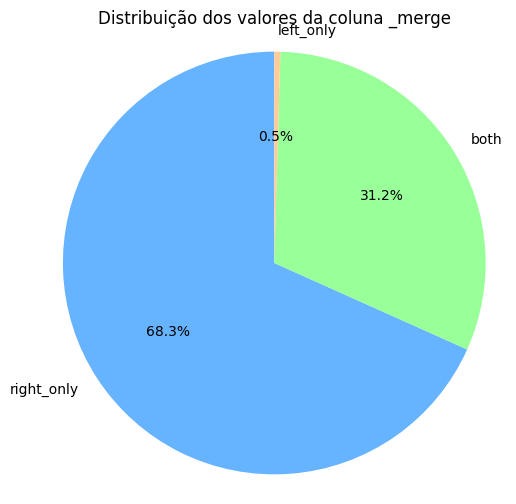

In [436]:
import matplotlib.pyplot as plt

# Contando as ocorrências dos valores na coluna '_merge'
merge_counts = merge_cnpj_numero_final['_merge'].value_counts()

# Criando o gráfico de pizza com base nos valores de '_merge'
plt.figure(figsize=(6,6))
plt.pie(merge_counts, labels=merge_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title("Distribuição dos valores da coluna _merge")
plt.axis('equal')  # Assegura que o gráfico seja desenhado como um círculo

# Exibindo o gráfico
plt.show()


In [394]:
# Função para remover parênteses quando o numero for negativo
def converter_negativos(val):
    if isinstance(val, str) and '(' in val and ')' in val:
        # Remove parênteses e converte para negativo
        val = val.replace('(', '-').replace(')', '')
    return val

# Aplicando a função para converter os valores com parênteses
merge_cnpj_numero_final['Despesas_Empenhadas_Mov_Liquido'] = merge_cnpj_numero_final['Despesas_Empenhadas_Mov_Liquido'].apply(converter_negativos)
merge_cnpj_numero_final['Despesas_Empenhadas_Saldo'] = merge_cnpj_numero_final['Despesas_Empenhadas_Saldo'].apply(converter_negativos)
merge_cnpj_numero_final['Despesas_Liquidadas_Mov_Liquido'] = merge_cnpj_numero_final['Despesas_Liquidadas_Mov_Liquido'].apply(converter_negativos)
merge_cnpj_numero_final['Despesas_Pagas_Mov_Liquido'] = merge_cnpj_numero_final['Despesas_Pagas_Mov_Liquido'].apply(converter_negativos)

# Convertendo as colunas para numérico, tratando valores inválidos
merge_cnpj_numero_final['Despesas_Empenhadas_Mov_Liquido'] = pd.to_numeric(merge_cnpj_numero_final['Despesas_Empenhadas_Mov_Liquido'], errors='coerce')
merge_cnpj_numero_final['Despesas_Empenhadas_Saldo'] = pd.to_numeric(merge_cnpj_numero_final['Despesas_Empenhadas_Saldo'], errors='coerce')
merge_cnpj_numero_final['Despesas_Liquidadas_Mov_Liquido'] = pd.to_numeric(merge_cnpj_numero_final['Despesas_Liquidadas_Mov_Liquido'], errors='coerce')
merge_cnpj_numero_final['Despesas_Pagas_Mov_Liquido'] = pd.to_numeric(merge_cnpj_numero_final['Despesas_Pagas_Mov_Liquido'], errors='coerce')

# Filtrando os valores maiores que 0


# Calculando a diferença entre o saldo das despesas empenhadas e o valor inicial
merge_cnpj_numero_final['diferenca_empenho'] = merge_cnpj_numero_final['Despesas_Empenhadas_Saldo'] - merge_cnpj_numero_final['valor_inicial']


# Exibindo o DataFrame filtrado
merge_cnpj_numero_final

id receita_despesa      numero  orgao_codigo  \
0           NaN             NaN         NaN           NaN   
1           NaN             NaN         NaN           NaN   
2           NaN             NaN         NaN           NaN   
3           NaN             NaN         NaN           NaN   
4           NaN             NaN         NaN           NaN   
...         ...             ...         ...           ...   
15770  102435.0         Despesa  00004/2021       61201.0   
15771  102435.0         Despesa  00004/2021       61201.0   
15772  102435.0         Despesa  00004/2021       61201.0   
15773  102435.0         Despesa  00004/2021       61201.0   
15774  102435.0         Despesa  00004/2021       61201.0   

                                     orgao_nome  unidade_codigo  \
0                                           NaN             NaN   
1                                           NaN             NaN   
2                                           NaN             NaN   
3                                           NaN             NaN   
4                                           NaN             NaN   
...                                         ...             ...   
15770  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
15771  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
15772  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
15773  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
15774  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   

      unidade_nome_resumido                              unidade_nome  \
0                       NaN                                       NaN   
1                       NaN                                       NaN   
2                       NaN                                       NaN   
3                       NaN                                       NaN   
4                       NaN                                       NaN   
...                     ...                                       ...   
15770               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
15771               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
15772               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
15773               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
15774               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   

       unidade_origem_codigo                       unidade_origem_nome  ...  \
0                        NaN                                       NaN  ...   
1                        NaN                                       NaN  ...   
2                        NaN                                       NaN  ...   
3                        NaN                                       NaN  ...   
4                        NaN                                       NaN  ...   
...                      ...                                       ...  ...   
15770               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
15771               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
15772               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
15773               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
15774               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   

                                   Natureza_Despesa_Nome  \
0         OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA   
1         OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA   
2         OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA   
3         OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA   
4         OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA   
...                                                  ...   
15770  SERVICOS DE TECNOLOGIA DA INFORMACAO E COMUNIC...   
15771  SERVICOS DE TECNOLOGIA DA INFORMACAO E COMUNIC...   
15772  SERVICOS DE TECNOLOGIA DA INFORMACAO E COMUNIC...   
15773  SERVICOS DE TECNOLOGIA DA INFORMACAO E COM

In [395]:
# Inicializando uma lista para armazenar as linhas que atendem às condições (saldos e mov <> 0)
merge_cnpj_num_mov_sld = []

# Definindo a tolerância para as diferenças
tolerancia = 0.01

# Iterando sobre as linhas do DataFrame filtrado
for index, row in merge_cnpj_numero_final.iterrows():
    # Calculando as diferenças para as colunas relevantes de saldo e movimento, tanto com valor inicial quanto global
    diferenca_empenhadas_saldo = row['Despesas_Empenhadas_Saldo'] - row['valor_inicial'] if row['Despesas_Empenhadas_Saldo'] > 0 else None
    diferenca_empenhadas_movim = row['Despesas_Empenhadas_Mov_Liquido'] - row['valor_inicial'] if row['Despesas_Empenhadas_Mov_Liquido'] > 0 else None

    diferenca_liquidadas_saldo = row['Despesas_Liquidadas_Saldo'] - row['valor_inicial'] if row['Despesas_Liquidadas_Saldo'] > 0 else None
    diferenca_liquidadas_movim = row['Despesas_Liquidadas_Mov_Liquido'] - row['valor_inicial'] if row['Despesas_Liquidadas_Mov_Liquido'] > 0 else None

    diferenca_pagas_saldo = row['Despesas_Pagas_Saldo'] - row['valor_inicial'] if row['Despesas_Pagas_Saldo'] > 0 else None
    diferenca_pagas_movim = row['Despesas_Pagas_Mov_Liquido'] - row['valor_inicial'] if row['Despesas_Pagas_Mov_Liquido'] > 0 else None

    # Diferenças globais
    diferenca_empenhadas_saldo_global = row['Despesas_Empenhadas_Saldo'] - row['valor_global'] if row['Despesas_Empenhadas_Saldo'] > 0 else None
    diferenca_empenhadas_movim_global = row['Despesas_Empenhadas_Mov_Liquido'] - row['valor_global'] if row['Despesas_Empenhadas_Mov_Liquido'] > 0 else None

    diferenca_liquidadas_saldo_global = row['Despesas_Liquidadas_Saldo'] - row['valor_global'] if row['Despesas_Liquidadas_Saldo'] > 0 else None
    diferenca_liquidadas_movim_global = row['Despesas_Liquidadas_Mov_Liquido'] - row['valor_global'] if row['Despesas_Liquidadas_Mov_Liquido'] > 0 else None

    diferenca_pagas_saldo_global = row['Despesas_Pagas_Saldo'] - row['valor_global'] if row['Despesas_Pagas_Saldo'] > 0 else None
    diferenca_pagas_movim_global = row['Despesas_Pagas_Mov_Liquido'] - row['valor_global'] if row['Despesas_Pagas_Mov_Liquido'] > 0 else None

    # Adicionando as diferenças à linha atual
    row['Diferenca_Despesas_Empenhadas_Saldo'] = diferenca_empenhadas_saldo
    row['Diferenca_Despesas_Empenhadas_Movim'] = diferenca_empenhadas_movim
    row['Diferenca_Despesas_Liquidadas_Saldo'] = diferenca_liquidadas_saldo
    row['Diferenca_Despesas_Liquidadas_Movim'] = diferenca_liquidadas_movim
    row['Diferenca_Despesas_Pagas_Saldo'] = diferenca_pagas_saldo
    row['Diferenca_Despesas_Pagas_Movim'] = diferenca_pagas_movim

    row['Diferenca_Despesas_Empenhadas_Saldo_Global'] = diferenca_empenhadas_saldo_global
    row['Diferenca_Despesas_Empenhadas_Movim_Global'] = diferenca_empenhadas_movim_global
    row['Diferenca_Despesas_Liquidadas_Saldo_Global'] = diferenca_liquidadas_saldo_global
    row['Diferenca_Despesas_Liquidadas_Movim_Global'] = diferenca_liquidadas_movim_global
    row['Diferenca_Despesas_Pagas_Saldo_Global'] = diferenca_pagas_saldo_global
    row['Diferenca_Despesas_Pagas_Movim_Global'] = diferenca_pagas_movim_global

    # Verificando se alguma das diferenças está entre -0.01 e 0.01 (para as duas comparações)
    row['Alguma_Diferenca_Zero'] = (
        (diferenca_empenhadas_saldo is not None and abs(diferenca_empenhadas_saldo) <= tolerancia) or
        (diferenca_empenhadas_movim is not None and abs(diferenca_empenhadas_movim) <= tolerancia) or
        (diferenca_liquidadas_saldo is not None and abs(diferenca_liquidadas_saldo) <= tolerancia) or
        (diferenca_liquidadas_movim is not None and abs(diferenca_liquidadas_movim) <= tolerancia) or
        (diferenca_pagas_saldo is not None and abs(diferenca_pagas_saldo) <= tolerancia) or
        (diferenca_pagas_movim is not None and abs(diferenca_pagas_movim) <= tolerancia)
    )
    row['Alguma_Diferenca_Zero_Global'] = (
        (diferenca_empenhadas_saldo_global is not None and abs(diferenca_empenhadas_saldo_global) <= tolerancia) or
        (diferenca_empenhadas_movim_global is not None and abs(diferenca_empenhadas_movim_global) <= tolerancia) or
        (diferenca_liquidadas_saldo_global is not None and abs(diferenca_liquidadas_saldo_global) <= tolerancia) or
        (diferenca_liquidadas_movim_global is not None and abs(diferenca_liquidadas_movim_global) <= tolerancia) or
        (diferenca_pagas_saldo_global is not None and abs(diferenca_pagas_saldo_global) <= tolerancia) or
        (diferenca_pagas_movim_global is not None and abs(diferenca_pagas_movim_global) <= tolerancia)
    )

    # Salvando a linha na lista
    merge_cnpj_num_mov_sld.append(row)

# Convertendo a lista de linhas em um DataFrame
merge_cnpj_num_mov_sld = pd.DataFrame(merge_cnpj_num_mov_sld)

# Resetando o índice e exibindo o resultado final
merge_cnpj_num_mov_sld.reset_index(drop=True, inplace=True)

# Exibindo o DataFrame final
merge_cnpj_num_mov_sld


id receita_despesa      numero  orgao_codigo  \
0           NaN             NaN         NaN           NaN   
1           NaN             NaN         NaN           NaN   
2           NaN             NaN         NaN           NaN   
3           NaN             NaN         NaN           NaN   
4           NaN             NaN         NaN           NaN   
...         ...             ...         ...           ...   
13894  102435.0         Despesa  00004/2021       61201.0   
13895  102435.0         Despesa  00004/2021       61201.0   
13896  102435.0         Despesa  00004/2021       61201.0   
13897  102435.0         Despesa  00004/2021       61201.0   
13898  102435.0         Despesa  00004/2021       61201.0   

                                     orgao_nome  unidade_codigo  \
0                                           NaN             NaN   
1                                           NaN             NaN   
2                                           NaN             NaN   
3                                           NaN             NaN   
4                                           NaN             NaN   
...                                         ...             ...   
13894  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
13895  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
13896  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
13897  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
13898  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   

      unidade_nome_resumido                              unidade_nome  \
0                       NaN                                       NaN   
1                       NaN                                       NaN   
2                       NaN                                       NaN   
3                       NaN                                       NaN   
4                       NaN                                       NaN   
...                     ...                                       ...   
13894               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
13895               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
13896               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
13897               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
13898               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   

       unidade_origem_codigo                       unidade_origem_nome  ...  \
0                        NaN                                       NaN  ...   
1                        NaN                                       NaN  ...   
2                        NaN                                       NaN  ...   
3                        NaN                                       NaN  ...   
4                        NaN                                       NaN  ...   
...                      ...                                       ...  ...   
13894               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
13895               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
13896               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
13897               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
13898               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   

      Diferenca_Despesas_Pagas_Saldo Diferenca_Despesas_Pagas_Movim  \
0                                NaN                            NaN   
1                                NaN                            NaN   
2                                NaN                            NaN   
3                                NaN                            NaN   
4                                NaN                            NaN   
...                              ...                            ...   
13894                     -371425.41                            NaN   
13895                            NaN                            NaN   
13896     

In [396]:
#Pega o último valor positivo de saldo nas colunas de saldo (despesas empenhadas, liquidadas e pagas).
#Soma os valores de movimentação líquida nas colunas de movimentação (despesas empenhadas, liquidadas e pagas).
#Consolida a diferença entre os valores, verificando se em qualquer linha do grupo há uma diferença igual a zero.
#Constrói uma linha consolidada para cada grupo (ano lançamento e id ), onde os valores somados e calculados são armazenados.



# Função para pegar o último valor de saldo acima de 0
def pegar_ultimo_saldo(grupo, coluna):
    ultimo_valor = grupo.loc[grupo[coluna] > 0, coluna]
    return ultimo_valor.iloc[-1] if not ultimo_valor.empty else 0

# Função para somar valores de movimentação líquida
def somar_movimento(grupo, coluna):
    return grupo[coluna].sum()

# Função para consolidar a diferença, pegando True se em qualquer linha for True
def consolidar_diferenca_zero(grupo):
    return grupo['Alguma_Diferenca_Zero'].any() or grupo['Alguma_Diferenca_Zero_Global'].any()

# Função principal para consolidar por 'Ano Lançamento' e 'numero'
def consolidar_grupo(grupo):
    # Pega a última linha do grupo
    ultima_linha = grupo.iloc[-1].copy()
    
    # Ajusta os valores das colunas que precisam ser somadas ou calculadas
    ultima_linha['Despesas_Empenhadas_Mov_Liquido'] = somar_movimento(grupo, 'Despesas_Empenhadas_Mov_Liquido')
    ultima_linha['Despesas_Liquidadas_Mov_Liquido'] = somar_movimento(grupo, 'Despesas_Liquidadas_Mov_Liquido')
    ultima_linha['Despesas_Pagas_Mov_Liquido'] = somar_movimento(grupo, 'Despesas_Pagas_Mov_Liquido')
    
    # Ajusta as colunas de saldo pegando o último valor acima de 0
    ultima_linha['Despesas_Empenhadas_Saldo'] = pegar_ultimo_saldo(grupo, 'Despesas_Empenhadas_Saldo')
    ultima_linha['Despesas_Liquidadas_Saldo'] = pegar_ultimo_saldo(grupo, 'Despesas_Liquidadas_Saldo')
    ultima_linha['Despesas_Pagas_Saldo'] = pegar_ultimo_saldo(grupo, 'Despesas_Pagas_Saldo')
    
    # Ajusta as colunas de diferença
    ultima_linha['Alguma_Diferenca_Zero_Consolidado'] = consolidar_diferenca_zero(grupo)
    
    return ultima_linha

# Aplicando a função de consolidação por 'Ano Lançamento' e 'numero'
merge_cnpj_num_mov_sld_grup_id_ano  = merge_cnpj_num_mov_sld.groupby(['Ano_Lancamento', 'id']).apply(consolidar_grupo).reset_index(drop=True)

# Identificando grupos que ficaram de fora por terem valores nulos nas colunas de movimentação líquida
grupos_nulos = merge_cnpj_num_mov_sld.groupby(['Ano_Lancamento', 'id']).filter(
    lambda grupo: grupo['Despesas_Empenhadas_Mov_Liquido'].isna().all() and 
                  grupo['Despesas_Liquidadas_Mov_Liquido'].isna().all() and 
                  grupo['Despesas_Pagas_Mov_Liquido'].isna().all()
)

# Se houver grupos nulos, pegar a última ocorrência de cada número para cada ano
if not grupos_nulos.empty:
    # Pegando a última linha de cada grupo com valores nulos
    linhas_nulas = grupos_nulos.groupby(['Ano_Lancamento', 'id']).last().reset_index()

    # Adicionando as linhas nulas ao final do DataFrame consolidado
    merge_cnpj_num_mov_sld_grup_id_ano  = pd.concat([merge_cnpj_num_mov_sld_grup_id_ano , linhas_nulas], ignore_index=True)





/tmp/ipykernel_9779/1820057880.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merge_cnpj_num_mov_sld_grup_id_ano  = merge_cnpj_num_mov_sld.groupby(['Ano_Lancamento', 'id']).apply(consolidar_grupo).reset_index(drop=True)


In [397]:
#Esse trecho realiza uma verificação entre os valores únicos da coluna id em dois DataFrames (linhas_salvas_dif e linhas_consolidadas) e retorna o  DataFrame linhas_consolidadas com todos os valores que estavam originalmente em linhas_salvas_dif, além das linhas faltantes.


# Garantindo que a coluna 'id' seja do mesmo tipo (string) em ambos os DataFrames
merge_cnpj_num_mov_sld['id'] = merge_cnpj_num_mov_sld['id'].astype(str).str.strip()
merge_cnpj_num_mov_sld_grup_id_ano ['id'] = merge_cnpj_num_mov_sld_grup_id_ano ['id'].astype(str).str.strip()

# Verificando os valores únicos de 'id' em linhas_salvas_dif e linhas_consolidadas
id_unicos_merge = merge_cnpj_num_mov_sld['id'].unique()
id_consolidados_group = merge_cnpj_num_mov_sld_grup_id_ano ['id'].unique()

# Identificando os valores de 'numero' que estão em linhas_salvas_dif mas não em linhas_consolidadas
id_faltantes = list(set(id_unicos_merge) - set(id_consolidados_group))

# Se houver números faltando, pegar a última ocorrência de cada um deles por 'Ano Lançamento'
if id_faltantes:
    # Filtrando as linhas com os números faltantes
    linhas_faltantes = merge_cnpj_num_mov_sld[merge_cnpj_num_mov_sld['id'].isin(id_faltantes)]
    linhas_faltantes.fillna(0, inplace=True)  # Ou substitua '0' pelo valor que preferir

    
    # Verificando se linhas_faltantes não está vazio
    if not linhas_faltantes.empty:
        # Pegando a última ocorrência de cada id para cada ano
        linhas_faltantes = linhas_faltantes.groupby(['Ano_Lancamento', 'id']).last().reset_index()
        
        # Adicionando as linhas faltantes ao DataFrame consolidado
        merge_cnpj_num_mov_sld_grup_id_ano  = pd.concat([merge_cnpj_num_mov_sld_grup_id_ano , linhas_faltantes], ignore_index=True)

# Exibindo o DataFrame consolidado atualizado
# Removendo as linhas em 'linhas_consolidadas' onde a coluna 'id' tem valor NaN
# Garantindo que 'NaN' sejam reconhecidos corretamente
merge_cnpj_num_mov_sld_grup_id_ano ['id'] = merge_cnpj_num_mov_sld_grup_id_ano ['id'].replace(['nan', 'None', ''], pd.NA)
# Removendo as linhas em 'linhas_consolidadas' onde a coluna 'numero' tem valor NaN
merge_cnpj_num_mov_sld_grup_id_ano  = merge_cnpj_num_mov_sld_grup_id_ano .dropna(subset=['id'])
merge_cnpj_num_mov_sld_grup_id_ano ['id'] = merge_cnpj_num_mov_sld_grup_id_ano ['id'].astype(float)

# Em seguida, converta os valores para int
merge_cnpj_num_mov_sld_grup_id_ano ['id'] = merge_cnpj_num_mov_sld_grup_id_ano ['id'].astype(int)



/tmp/ipykernel_9779/3612219685.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  linhas_faltantes.fillna(0, inplace=True)  # Ou substitua '0' pelo valor que preferir
/tmp/ipykernel_9779/3612219685.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linhas_faltantes.fillna(0, inplace=True)  # Ou substitua '0' pelo valor que preferir


#### tabela de contratos batida com o tesouro gerencial

Contratos no comprasnet (left)
Contratos Tesouro (right)
ambos (both)

In [398]:
merge_cnpj_num_mov_sld_grup_id_ano 

id receita_despesa        numero  orgao_codigo  \
0      2399         Despesa    00001/2019       61201.0   
1      2400         Despesa    00002/2019       61201.0   
2      2439         Despesa    00003/2019       61201.0   
3      2443         Despesa    00006/2019       61201.0   
4      2457         Despesa    00026/2019       61201.0   
..      ...             ...           ...           ...   
132  305749         Despesa  2024NE000021       61201.0   
133  306448         Despesa  2024NE000014       61201.0   
134  147081         Despesa    00010/2022       61201.0   
135  160543         Despesa    00002/2022       61201.0   
136  306298         Despesa    00012/2024       61201.0   

                                   orgao_nome  unidade_codigo  \
0    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
1    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
2    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
3    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
4    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
..                                        ...             ...   
132  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113602.0   
133  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113602.0   
134  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
135  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113602.0   
136  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   

    unidade_nome_resumido                              unidade_nome  \
0                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
1                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
2                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
3                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
4                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
..                    ...                                       ...   
132               IPEA/RJ  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
133               IPEA/RJ  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
134               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
135               IPEA/RJ  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
136               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   

     unidade_origem_codigo                       unidade_origem_nome  ...  \
0                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
1                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
2                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
3                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
4                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
..                     ...                                       ...  ...   
132               113602.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
133               113602.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
134               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
135               113602.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
136               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   

    Diferenca_Despesas_Pagas_Movim Diferenca_Despesas_Empenhadas_Saldo_Global  \
0                              NaN                                -1390062.88   
1                              NaN                                -5715056.20   
2                              NaN                                -2669286.56   
3                              NaN                                    9999.99   
4                      -1681725.32                                        NaN   
..                             ...                                        ...   
132                            NaN                                        NaN   
133                            NaN                                        NaN   
134         

### Etapa 3.1 - verificar se algum contrato ficou de fora da tabela final

In [399]:
list_group_id = merge_cnpj_num_mov_sld_grup_id_ano ['id'].unique()
list_group_id

array([  2399,   2400,   2439,   2443,   2457,   2720,   4020,   4110,
         5618,   5619,  64828,  88309, 117589, 125684, 127115, 134295,
       134573, 134845, 135691, 136823, 140731, 141646, 141853, 146271,
       148778, 165821, 171508, 174875, 183180, 183517, 186205, 186302,
       194042, 200054, 200056, 200057, 200063, 200082, 200085, 202589,
       213547, 222210, 232298, 234357, 235451, 242027, 242896,  97446,
       102435, 251883, 252332, 262666, 263191, 264096, 264097, 264441,
       264504, 264674, 266791, 266797, 266839, 266842, 266848, 266867,
       267172, 267181, 267192, 267213, 267215, 267525, 267548, 270959,
       276014, 283490, 284149, 284156, 284159, 284167, 284174, 284179,
       284181, 284186, 284189, 284196, 284201, 284202, 284203, 284208,
       288533, 289605, 291042, 291083, 295851, 299366, 300189, 305749,
       306448, 147081, 160543, 306298])

In [400]:
list_contratos_comprasnet=contratos_comprasnet['id'].unique()
list_contratos_comprasnet

array([102435,  64828,   2457, 148778, 262666, 186302, 291083, 291042,
       264674, 263191, 264441, 222210, 160543, 267181, 267192, 267172,
       264504, 264096, 264097, 267213, 267215, 267525, 270959, 127115,
       266797, 266839, 266842, 266848, 266867, 146271, 276014,   2443,
       267548,   5618, 141646,   4020,  88309,   4110,   5619,   2720,
         2399,   2400,   2439,  97446, 125684, 136823, 202589, 140731,
       266791, 134295, 134573, 117589, 134845, 135691, 147081, 284179,
       284156, 251883, 289605, 186205, 235451, 171508, 283490, 242027,
       165821, 183517, 284167, 284189, 284203, 284149, 284174, 284201,
       284202, 284196, 284186, 284181, 284159, 284208, 299366, 174875,
       300189, 295851, 305749, 306298, 306448, 183180, 200056, 200063,
       200054, 200082, 200057, 200085, 194042, 213547, 252332, 232298,
       141853, 234357, 242896, 288533])

In [401]:
# CONFERÊNCIA PARA SABER SE ALGUM CONTRATO FICOU DE FORA, se retornar vazio é pq todos os ids do arquivo contrato inicial estão presentes

# Encontrando elementos em list5 que não estão em list6
diferenca_group_nao_comprasnet = list(set(list_group_id) - set(list_contratos_comprasnet))

# Encontrando elementos em list6 que não estão em list5
diferenca_comprasnet_nao_group = list(set(list_contratos_comprasnet) - set(list_group_id))

# Exibindo os resultados
print("Elementos em list2 que não estão em list1:", diferenca_group_nao_comprasnet)
print("Elementos em list1 que não estão em list2:", diferenca_comprasnet_nao_group)

Elementos em list2 que não estão em list1: []
Elementos em list1 que não estão em list2: []


# INFORMAÇÕES COMPLEMENTARES

### contratos em que os valores do comprasnet batem com o do tesouro gerencial

In [402]:
contratos_batidos_comprasnet_tesouro = merge_cnpj_num_mov_sld_grup_id_ano [merge_cnpj_num_mov_sld_grup_id_ano ['Alguma_Diferenca_Zero_Consolidado'] == True]
list_contr_batidos_comprasnet_tesouro =contratos_batidos_comprasnet_tesouro['id'].unique()
print(list_contr_batidos_comprasnet_tesouro)  # retorna quantos contratos bateram de alguma forma com  o tesouro
print('\n')
print(f' total contratos batidos: {len(list_contr_batidos_comprasnet_tesouro)}')

[136823 141853 183180 186205 186302 194042 202589 213547 232298 234357
 242027 242896 102435 262666 263191 264096 264097 264441 264504 264674
 266791 266797 266839 266842 266848 266867 267181 267192 267213 267525
 267548 270959 276014 284149 284156 284159 284167 284174 284179 284181
 284186 284189 284196 284201 284202 284203 284208 288533 289605 291042
 299366 305749 306448]


 total contratos batidos: 53


In [437]:
quant_total_contratos = contratos_comprasnet['id'].unique()

print(quant_total_contratos)  # retorna quantos contratos bateram de alguma forma com  o tesouro
print('\n')
print(f' total contratos comprasnet: {len(quant_total_contratos)}')

[102435  64828   2457 148778 262666 186302 291083 291042 264674 263191
 264441 222210 160543 267181 267192 267172 264504 264096 264097 267213
 267215 267525 270959 127115 266797 266839 266842 266848 266867 146271
 276014   2443 267548   5618 141646   4020  88309   4110   5619   2720
   2399   2400   2439  97446 125684 136823 202589 140731 266791 134295
 134573 117589 134845 135691 147081 284179 284156 251883 289605 186205
 235451 171508 283490 242027 165821 183517 284167 284189 284203 284149
 284174 284201 284202 284196 284186 284181 284159 284208 299366 174875
 300189 295851 305749 306298 306448 183180 200056 200063 200054 200082
 200057 200085 194042 213547 252332 232298 141853 234357 242896 288533]


 total contratos comprasnet: 100


## Etapa 4 - Filtrar contratos com CNPJs unicos/duplicados

In [404]:
# LISTA AS EMPRESAS COM MAIS DE UM CONTRATO

# Agrupar por 'cnpj_num' e contar os 'id'
cnpj_counts = contratos_comprasnet.groupby('cnpj_num').count()

# Filtrar os 'cnpj_num' que possuem mais de um 'id'
cnpj_multiple_ids = cnpj_counts[cnpj_counts['id'] > 1].index

# Filtrar o DataFrame original para mostrar apenas esses 'cnpj_num'
empresas_com_varios_contratos = contratos_comprasnet[contratos_comprasnet['cnpj_num'].isin(cnpj_multiple_ids)]


#pegar estas empresas com mais de um contrato e procurar linhas no tesouro que contenham o numero do contrato, filtrar pelo cnpj 

empresas_com_varios_contratos

id receita_despesa        numero  orgao_codigo  \
8404   267192         Despesa  2024NE000184         61201   
9359   267525         Despesa  2024NE000183         61201   
12039  127115         Despesa    00015/2021         61201   
13283  266797         Despesa  2024NE000178         61201   
13317  266839         Despesa  2024NE000179         61201   
13333  266848         Despesa  2024NE000181         61201   
13349  266867         Despesa  2024NE000182         61201   
15798  276014         Despesa  2024NE000205         61201   
19893  267548         Despesa  2024NE000186         61201   
21062  141646         Despesa    00008/2022         61201   
24784   88309         Despesa    00001/2021         61201   
28569    2399         Despesa    00001/2019         61201   
31126    2400         Despesa    00002/2019         61201   
32781    2439         Despesa    00003/2019         61201   
33251   97446         Despesa    00005/2021         61201   
35367  266791         Despesa    00005/2024         61201   
38789  134845         Despesa    00001/2022         61201   
48957  289605         Despesa    00009/2024         61201   
61228  284167         Despesa  2024NE000191         61201   
61357  284159         Despesa  2024NE000190         61201   
78072  306448         Despesa  2024NE000014         61201   
79197  183180         Despesa  2023NE000015         61201   
87739  200056         Despesa    00014/2023         61201   
87742  200063         Despesa    00015/2023         61201   
87751  200054         Despesa    00011/2023         61201   
87756  200082         Despesa    00012/2023         61201   
87994  200057         Despesa    00016/2023         61201   
95379  141853         Despesa    00001/2022         61201   

                                     orgao_nome  unidade_codigo  \
8404   INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
9359   INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
12039  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
13283  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
13317  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
13333  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
13349  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
15798  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
19893  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
21062  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
24784  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113602   
28569  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
31126  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
32781  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
33251  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
35367  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
38789  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
48957  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
61228  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
61357  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
78072  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113602   
79197  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113602   
87739  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
87742  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
87751  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
87756  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
87994  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
95379  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113602   

      unidade_nome_resumido                              unidade_nome  \
8404                IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
9359                IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
12039               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
13283

### Contratos de Empresas que tem um único contrato

In [405]:
#ELIMINA AS EMPRESAS COM MAIS DE UM CONTRATO PARA FAZER BUSCAS MAIS DETALHADAS

# Obter os valores únicos de 'cnpj_num' em 'empresas_varios_contratos'
cnpjs_para_remover = empresas_com_varios_contratos['cnpj_num'].unique()

# Remover as linhas de 'linhas_consolidadas' onde 'cnpj_num' está presente em 'cnpjs_para_remover'
empresas_com_contratos_unicos = merge_cnpj_num_mov_sld_grup_id_ano [~merge_cnpj_num_mov_sld_grup_id_ano ['cnpj_num'].isin(cnpjs_para_remover)]

# Exibir o DataFrame resultante
empresas_com_contratos_unicos


id receita_despesa        numero  orgao_codigo  \
3      2443         Despesa    00006/2019       61201.0   
4      2457         Despesa    00026/2019       61201.0   
5      2720         Despesa    00001/2018       61201.0   
6      4020         Despesa    00010/2019       61201.0   
7      4110         Despesa    00005/2019       61201.0   
..      ...             ...           ...           ...   
131  300189         Despesa    00011/2024       61201.0   
132  305749         Despesa  2024NE000021       61201.0   
134  147081         Despesa    00010/2022       61201.0   
135  160543         Despesa    00002/2022       61201.0   
136  306298         Despesa    00012/2024       61201.0   

                                   orgao_nome  unidade_codigo  \
3    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
4    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
5    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
6    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113602.0   
7    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113602.0   
..                                        ...             ...   
131  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
132  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113602.0   
134  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
135  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113602.0   
136  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   

    unidade_nome_resumido                              unidade_nome  \
3                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
4                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
5                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
6                 IPEA/RJ  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
7                 IPEA/RJ  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
..                    ...                                       ...   
131               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
132               IPEA/RJ  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
134               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
135               IPEA/RJ  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
136               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   

     unidade_origem_codigo                       unidade_origem_nome  ...  \
3                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
4                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
5                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
6                 113602.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
7                 113602.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
..                     ...                                       ...  ...   
131               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
132               113602.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
134               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
135               113602.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
136               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   

    Diferenca_Despesas_Pagas_Movim Diferenca_Despesas_Empenhadas_Saldo_Global  \
3                              NaN                                    9999.99   
4                      -1681725.32                                        NaN   
5                              NaN                                 -115031.79   
6                              NaN                                  -34642.22   
7                       -305465.15                                        NaN   
..                             ...                                        ...   
131                            NaN                                -5073173.38   
132                            NaN                                        NaN   
134         

In [406]:
### Contratos de CNPJs que possuem apenas um contrato
# printar contratos
print(empresas_com_contratos_unicos['id'].unique())
print('\n')
print(f"total de id de empresas com um contrato: {len(empresas_com_contratos_unicos['id'].unique())}")


[  2443   2457   2720   4020   4110   5618   5619  64828 117589 125684
 134295 134573 135691 136823 140731 146271 148778 165821 171508 174875
 183517 186205 186302 194042 200085 202589 213547 222210 232298 234357
 235451 242027 242896 102435 251883 252332 262666 263191 264096 264097
 264441 264504 264674 266842 267172 267181 267213 267215 270959 283490
 284149 284156 284174 284179 284181 284186 284189 284196 284201 284202
 284203 284208 288533 291042 291083 295851 299366 300189 305749 147081
 160543 306298]


total de id de empresas com um contrato: 72


### Contratos de empresas que possuem mais de um contrato

In [407]:
# Obter os valores únicos de 'cnpj_num' em 'empresas_varios_contratos'
cnpjs_para_remover = empresas_com_varios_contratos['cnpj_num'].unique()

# Criar um DataFrame com as linhas que foram eliminadas, 
# mas não remover as linhas onde 'Alguma_Diferenca_Zero_Consolidado == True'
linhas_eliminadas_mult_contratos = merge_cnpj_num_mov_sld_grup_id_ano [
    (merge_cnpj_num_mov_sld_grup_id_ano ['cnpj_num'].isin(cnpjs_para_remover)) &  # Verificar se está no conjunto para remover
    (merge_cnpj_num_mov_sld_grup_id_ano ['Alguma_Diferenca_Zero_Consolidado'] != True)  # Não remover se Alguma_Diferenca_Zero_Consolidado for True
]

# Exibir o DataFrame resultante com as linhas eliminadas
linhas_eliminadas_mult_contratos

id receita_despesa        numero  orgao_codigo  \
0     2399         Despesa    00001/2019       61201.0   
1     2400         Despesa    00002/2019       61201.0   
2     2439         Despesa    00003/2019       61201.0   
11   88309         Despesa    00001/2021       61201.0   
14  127115         Despesa    00015/2021       61201.0   
17  134845         Despesa    00001/2022       61201.0   
21  141646         Despesa    00008/2022       61201.0   
33  200054         Despesa    00011/2023       61201.0   
34  200056         Despesa    00014/2023       61201.0   
35  200057         Despesa    00016/2023       61201.0   
36  200063         Despesa    00015/2023       61201.0   
37  200082         Despesa    00012/2023       61201.0   
47    2399         Despesa    00001/2019       61201.0   
48    2400         Despesa    00002/2019       61201.0   
49    2439         Despesa    00003/2019       61201.0   
56   88309         Despesa    00001/2021       61201.0   
57   97446         Despesa    00005/2021       61201.0   
60  127115         Despesa    00015/2021       61201.0   
62  134845         Despesa    00001/2022       61201.0   
66  141646         Despesa    00008/2022       61201.0   
67  141853         Despesa    00001/2022       61201.0   
71  183180         Despesa  2023NE000015       61201.0   
75  200054         Despesa    00011/2023       61201.0   
76  200056         Despesa    00014/2023       61201.0   
77  200057         Despesa    00016/2023       61201.0   
78  200063         Despesa    00015/2023       61201.0   
79  200082         Despesa    00012/2023       61201.0   

                                  orgao_nome  unidade_codigo  \
0   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
1   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
2   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
11  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113602.0   
14  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
17  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
21  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
33  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
34  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
35  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
36  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
37  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
47  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
48  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
49  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
56  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113602.0   
57  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
60  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
62  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
66  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
67  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113602.0   
71  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113602.0   
75  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
76  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
77  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
78  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
79  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   

   unidade_nome_resumido                              unidade_nome  \
0                IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
1                IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
2                IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
11               IPEA/RJ  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
14               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
17               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
21               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
33               IPEA/DF  INST

In [408]:
print(f"Quantidade de empresas com mais de um contrato por CNPJ: {len(linhas_eliminadas_mult_contratos['cnpj_num'].unique())}")
print('\n')
print(linhas_eliminadas_mult_contratos['cnpj_num'].unique())

Quantidade de empresas com mais de um contrato por CNPJ: 7


['08744139000151' '34028316000294' '12187221000108' '15790987000162'
 '00712411000100' '04198254000117' '07492558000180']


In [409]:
# printar contratos
print(f"total de id de empreasas com mais de um contrato: {len(linhas_eliminadas_mult_contratos['id'].unique())}")
print('\n')
print(linhas_eliminadas_mult_contratos['id'].unique())



total de id de empreasas com mais de um contrato: 15


[  2399   2400   2439  88309 127115 134845 141646 200054 200056 200057
 200063 200082  97446 141853 183180]


# Etapa 5 - Tratamento dos casos Duplicados

In [410]:
# VERREDURA PARA AS EMPRESAS COM MAIS DE UM CONTRATO
#   
# 1. BUSCA POR Nº CONTRATO NA DESCRIÇÃO DO LANÇAMENTO NO TESOURO GERENCIAL
# 2. Nº EMPENHO NA DESCRIÇÃO DO LANÇAMENTO NO TESOURO GERENCIAL

# RETORNA
# df_merge_CNPJ_varios_contratos
# contratos_nao_encontrados_df

# Padronizar a coluna 'cnpj_num' no DataFrame 'empresas_varios_contratos' e 'NE_CCor_Favorecido' no DataFrame 'tesouro_ipea_ano_movimento'
empresas_com_varios_contratos['cnpj_num'] = empresas_com_varios_contratos['cnpj_num'].astype(str).str.zfill(14)
tesouro_por_ano_movimento['NE_CCor_Favorecido'] = tesouro_por_ano_movimento['NE_CCor_Favorecido'].astype(str).str.zfill(14)

# Criar uma nova coluna 'NE_CCor_reduzido' removendo os 11 primeiros dígitos da coluna 'NE_CCor'
#tesouro_por_ano_movimento['NE_CCor_reduzido'] = tesouro_por_ano_movimento['NE_CCor'].apply(lambda x: str(x)[11:] if isinstance(x, str) else x)

# Lista para armazenar os resultados de busca e os contratos não encontrados
resultados_busca_tesouro = []
contratos_nao_encontrados_tesouro = []

# Iterar sobre cada linha de empresas_varios_contratos
for idx, row in empresas_com_varios_contratos.iterrows():
    # Verificar se o CNPJ bate com o NE_CCor_Favorecido ou se o número reduzido de NE_CCor bate com numero_sem_zeros
    cnpj = row['cnpj_num']
    numero_sem_zeros = row['numero'].lstrip('0')
    
    # Filtrar o DataFrame tesouro_ipea_ano_movimento por CNPJ correspondente ou NE_CCor reduzido
    filtro_cnpj = tesouro_por_ano_movimento[
        (tesouro_por_ano_movimento['NE_CCor_Favorecido'] == cnpj) |
        (tesouro_por_ano_movimento['NE_CCor_reduzido'] == numero_sem_zeros)
    ]
    
    # Se o CNPJ ou o número reduzido bater, procurar o número (sem zeros à esquerda) na coluna 'NE CCor - Descrição'
    if not filtro_cnpj.empty:
        # Procurar se o 'numero_sem_zeros' está contido em 'NE CCor - Descrição'
        filtro_numero = filtro_cnpj[filtro_cnpj['NE CCor - Descrição'].str.contains(numero_sem_zeros, na=False)]
        
        # Se encontrar correspondência, adicionar ao resultado
        if not filtro_numero.empty:
            # Combinar os DataFrames lado a lado sem criar colunas duplicadas
            filtro_numero['cnpj_num'] = row['cnpj_num']  # Adiciona a coluna cnpj_num ao resultado encontrado
            filtro_numero['numero'] = row['numero']      # Adiciona a coluna numero ao resultado encontrado
            resultados_busca_tesouro.append(filtro_numero)
        else:
            # Adicionar o contrato na lista de contratos não encontrados
            contratos_nao_encontrados_tesouro.append(row)
    else:
        # Adicionar o contrato na lista de contratos não encontrados
        contratos_nao_encontrados_tesouro.append(row)

# Concatenar todos os resultados encontrados em um único DataFrame
if resultados_busca_tesouro:
    resultado_busca_tesouro_concatenado = pd.concat(resultados_busca_tesouro, ignore_index=True)

    # Realizar o merge final entre 'empresas_varios_contratos' e 'resultado_busca_concatenado' usando o CNPJ e número
    df_merge_CNPJ_varios_contratos = pd.merge(empresas_com_varios_contratos, resultado_busca_tesouro_concatenado, 
                                              left_on=['cnpj_num', 'numero'], right_on=['cnpj_num', 'numero'], 
                                              how='outer', indicator=True)
    


# Exibir os contratos cujo número sem zeros não foi encontrado
if contratos_nao_encontrados_tesouro:
    contratos_mult_nao_encontrados_tesouro = pd.DataFrame(contratos_nao_encontrados_tesouro)

# Agora, nova busca para contratos não encontrados, comparando com a coluna NE_CCor (ignorando os primeiros 11 dígitos)
resultados_busca_adicional_tesouro = []

# Iterar sobre os contratos não encontrados
for idx, row in contratos_mult_nao_encontrados_tesouro.iterrows():
    numero_sem_zeros = row['numero'].lstrip('0')
    
    # Filtrar o DataFrame onde o valor 'numero_sem_zeros' está contido no 'NE_CCor_reduzido'
    filtro_numero_reduzido = tesouro_por_ano_movimento[tesouro_por_ano_movimento['NE_CCor_reduzido'].str.contains(numero_sem_zeros, na=False)]
    
    # Se encontrar correspondência, adicionar ao resultado
    if not filtro_numero_reduzido.empty:
        filtro_numero_reduzido['cnpj_num'] = row['cnpj_num']  # Adiciona a coluna cnpj_num ao resultado encontrado
        filtro_numero_reduzido['numero'] = row['numero']      # Adiciona a coluna numero ao resultado encontrado
        resultados_busca_adicional_tesouro.append(filtro_numero_reduzido)

# Concatenar os resultados adicionais ao DataFrame existente 'df_merge_CNPJ_varios_contratos'
if resultados_busca_adicional_tesouro:
    resultado_busca_adicional_concatenado = pd.concat(resultados_busca_adicional_tesouro, ignore_index=True)
    
    # Realizar o merge final entre os DataFrames, adicionando os novos resultados
    df_merge_CNPJ_varios_contratos = pd.concat([df_merge_CNPJ_varios_contratos, resultado_busca_adicional_concatenado], ignore_index=True)
    
    # Atualizar contratos não encontrados
    contratos_mult_nao_encontrados_tesouro = contratos_mult_nao_encontrados_tesouro[~contratos_mult_nao_encontrados_tesouro['numero'].isin(resultado_busca_adicional_concatenado['numero'])]



contratos_mult_nao_encontrados_tesouro


   

/tmp/ipykernel_9779/3332586990.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empresas_com_varios_contratos['cnpj_num'] = empresas_com_varios_contratos['cnpj_num'].astype(str).str.zfill(14)
/tmp/ipykernel_9779/3332586990.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesouro_por_ano_movimento['NE_CCor_Favorecido'] = tesouro_por_ano_movimento['NE_CCor_Favorecido'].astype(str).str.zfill(14)
/tmp/ipykernel_9779/3332586990.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

id receita_despesa        numero  orgao_codigo  \
24784   88309         Despesa    00001/2021         61201   
33251   97446         Despesa    00005/2021         61201   
35367  266791         Despesa    00005/2024         61201   
48957  289605         Despesa    00009/2024         61201   
79197  183180         Despesa  2023NE000015         61201   
95379  141853         Despesa    00001/2022         61201   

                                     orgao_nome  unidade_codigo  \
24784  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113602   
33251  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
35367  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
48957  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
79197  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113602   
95379  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113602   

      unidade_nome_resumido                              unidade_nome  \
24784               IPEA/RJ  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
33251               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
35367               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
48957               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
79197               IPEA/RJ  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
95379               IPEA/RJ  INSTITUTO DE PESQUISA ECONOMICA APLICADA   

       unidade_origem_codigo                            unidade_origem_nome  \
24784               113602.0       INSTITUTO DE PESQUISA ECONOMICA APLICADA   
33251               457715.0  ASCOM - ASSOCIACAO COMUNITARIA DE SAO SEBASTI   
35367               113601.0       INSTITUTO DE PESQUISA ECONOMICA APLICADA   
48957               113601.0       INSTITUTO DE PESQUISA ECONOMICA APLICADA   
79197               113602.0       INSTITUTO DE PESQUISA ECONOMICA APLICADA   
95379               113602.0       INSTITUTO DE PESQUISA ECONOMICA APLICADA   

       ... data_assinatura data_publicacao vigencia_inicio vigencia_fim  \
24784  ...      2021-01-21      2021-02-08      2021-01-21   2026-01-21   
33251  ...      2021-04-06      2021-04-09      2021-04-06   2024-04-06   
35367  ...      2024-05-07      2024-05-08      2024-05-07   2025-05-07   
48957  ...      2024-07-17      2024-07-19      2024-07-17   2026-07-17   
79197  ...      2023-02-15      2023-02-24      2023-02-27   2023-12-31   
95379  ...      2022-03-31      2023-05-30      2022-03-31   2025-03-31   

       valor_inicial valor_global num_parcelas valor_parcela valor_acumulado  \
24784        1718.32      1718.32            1       1718.32         1718.32   
33251       17595.00     17595.00            1      17595.00        17595.00   
35367       29874.00     29874.00            1      29874.00        29874.00   
48957      245190.75    245190.75            1     245190.75            0.00   
79197        1074.00      1074.00            1       1074.00            0.00   
95379        4493.81      4691.09           12        390.92        13678.56   

       situacao  
24784     Ativo  
33251   Inativo  
35367     Ativo  
48957     Ativo  
79197     Ativo  
95379     Ativo  

[6 rows x 35 columns]

In [411]:
df_merge_CNPJ_varios_contratos

id receita_despesa        numero  orgao_codigo  \
0    200082.0         Despesa    00012/2023       61201.0   
1    200082.0         Despesa    00012/2023       61201.0   
2    200082.0         Despesa    00012/2023       61201.0   
3    200082.0         Despesa    00012/2023       61201.0   
4    200082.0         Despesa    00012/2023       61201.0   
..        ...             ...           ...           ...   
676       NaN             NaN  2024NE000014           NaN   
677       NaN             NaN  2024NE000014           NaN   
678       NaN             NaN  2024NE000014           NaN   
679       NaN             NaN  2024NE000014           NaN   
680       NaN             NaN  2024NE000014           NaN   

                                   orgao_nome  unidade_codigo  \
0    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
1    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
2    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
3    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
4    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
..                                        ...             ...   
676                                       NaN             NaN   
677                                       NaN             NaN   
678                                       NaN             NaN   
679                                       NaN             NaN   
680                                       NaN             NaN   

    unidade_nome_resumido                              unidade_nome  \
0                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
1                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
2                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
3                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
4                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
..                    ...                                       ...   
676                   NaN                                       NaN   
677                   NaN                                       NaN   
678                   NaN                                       NaN   
679                   NaN                                       NaN   
680                   NaN                                       NaN   

     unidade_origem_codigo                       unidade_origem_nome  ...  \
0                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
1                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
2                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
3                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
4                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
..                     ...                                       ...  ...   
676                    NaN                                       NaN  ...   
677                    NaN                                       NaN  ...   
678                    NaN                                       NaN  ...   
679                    NaN                                       NaN  ...   
680                    NaN                                       NaN  ...   

    Natureza_Despesa                           Natureza_Despesa_Nome  \
0           339037.0                          LOCACAO DE MAO-DE-OBRA   
1           339037.0                          LOCACAO DE MAO-DE-OBRA   
2           339037.0                          LOCACAO DE MAO-DE-OBRA   
3           339037.0                          LOCACAO DE MAO-DE-OBRA   
4           339037.0                          LOCACAO DE MAO-DE-OBRA   
..               ...                                             ...   
676         339039.0  OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA   
677         339039.0  OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA   
678         339039.0  OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA   

In [412]:
# SEGUNDA VARREDURA > BUSCA PELO Nº DO PROCESSO COMPRASNET X TESOURO GERENCIAL

# RETORNA
# df_merge_CNPJ_varios_contratos
# contratos_nao_encontrados_df

# Função para remover caracteres especiais mantendo a sequência de números
def remover_caracteres_especiais(texto):
    if isinstance(texto, str):
        return re.sub(r'[./,-]', '', texto)
    return texto

# Remover caracteres especiais dos números de processo nos dois DataFrames
tesouro_por_ano_movimento['NE_Num_Processo_Limpo'] = tesouro_por_ano_movimento['NE_Num_Processo'].apply(remover_caracteres_especiais)
empresas_com_varios_contratos['processo_limpo'] = empresas_com_varios_contratos['processo'].apply(remover_caracteres_especiais)

# Lista para armazenar os resultados da terceira busca
resultados_terceira_busca_tesouro = []

# Verificar se existem múltiplos processos associados ao mesmo CNPJ
cnpj_counts = empresas_com_varios_contratos['cnpj_num'].value_counts()
cnpj_multiplos_processos = cnpj_counts[cnpj_counts > 1].index.tolist()

# Iterar sobre os contratos não encontrados da segunda busca
for idx, row in contratos_mult_nao_encontrados_tesouro.iterrows():
    cnpj = row['cnpj_num']
    
    # Verificar se o CNPJ possui mais de um processo associado
    if cnpj in cnpj_multiplos_processos:
        processo_limpo = remover_caracteres_especiais(row['processo'])
        
        # Filtrar o DataFrame tesouro_ipea_ano_movimento pela coluna NE_Num_Processo_Limpo
        filtro_processo = tesouro_por_ano_movimento[tesouro_por_ano_movimento['NE_Num_Processo_Limpo'].str.contains(processo_limpo, na=False)]
        
        # Se encontrar correspondência, adicionar ao resultado
        if not filtro_processo.empty:
            filtro_processo['cnpj_num'] = row['cnpj_num']  # Adiciona a coluna cnpj_num ao resultado encontrado
            filtro_processo['processo'] = row['processo']  # Adiciona a coluna processo ao resultado encontrado
            resultados_terceira_busca_tesouro.append(filtro_processo)

# Concatenar os resultados da terceira busca ao DataFrame existente 'df_merge_CNPJ_varios_contratos'
if resultados_terceira_busca_tesouro:
    resultado_busca_terceira_concatenado = pd.concat(resultados_terceira_busca_tesouro, ignore_index=True)
    
    # Realizar o merge final entre os DataFrames, adicionando os novos resultados
    df_merge_CNPJ_varios_contratos = pd.concat([df_merge_CNPJ_varios_contratos, resultado_busca_terceira_concatenado], ignore_index=True)
    
    # Atualizar contratos_nao_encontrados_df removendo os contratos encontrados na terceira busca
    contratos_mult_nao_encontrados_tesouro = contratos_mult_nao_encontrados_tesouro[~contratos_mult_nao_encontrados_tesouro['processo'].isin(resultado_busca_terceira_concatenado['processo'])]



# Exibindo o DataFrame atualizado
df_merge_CNPJ_varios_contratos


/tmp/ipykernel_9779/696547654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesouro_por_ano_movimento['NE_Num_Processo_Limpo'] = tesouro_por_ano_movimento['NE_Num_Processo'].apply(remover_caracteres_especiais)
/tmp/ipykernel_9779/696547654.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empresas_com_varios_contratos['processo_limpo'] = empresas_com_varios_contratos['processo'].apply(remover_caracteres_especiais)
/tmp/ipykernel_9779/696547654.py:37: SettingWithCopyWarning: 
A value is trying to b

id receita_despesa      numero  orgao_codigo  \
0    200082.0         Despesa  00012/2023       61201.0   
1    200082.0         Despesa  00012/2023       61201.0   
2    200082.0         Despesa  00012/2023       61201.0   
3    200082.0         Despesa  00012/2023       61201.0   
4    200082.0         Despesa  00012/2023       61201.0   
..        ...             ...         ...           ...   
682       NaN             NaN         NaN           NaN   
683       NaN             NaN         NaN           NaN   
684       NaN             NaN         NaN           NaN   
685       NaN             NaN         NaN           NaN   
686       NaN             NaN         NaN           NaN   

                                   orgao_nome  unidade_codigo  \
0    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
1    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
2    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
3    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
4    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
..                                        ...             ...   
682                                       NaN             NaN   
683                                       NaN             NaN   
684                                       NaN             NaN   
685                                       NaN             NaN   
686                                       NaN             NaN   

    unidade_nome_resumido                              unidade_nome  \
0                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
1                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
2                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
3                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
4                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
..                    ...                                       ...   
682                   NaN                                       NaN   
683                   NaN                                       NaN   
684                   NaN                                       NaN   
685                   NaN                                       NaN   
686                   NaN                                       NaN   

     unidade_origem_codigo                       unidade_origem_nome  ...  \
0                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
1                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
2                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
3                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
4                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
..                     ...                                       ...  ...   
682                    NaN                                       NaN  ...   
683                    NaN                                       NaN  ...   
684                    NaN                                       NaN  ...   
685                    NaN                                       NaN  ...   
686                    NaN                                       NaN  ...   

                                 Natureza_Despesa_Nome  \
0                               LOCACAO DE MAO-DE-OBRA   
1                               LOCACAO DE MAO-DE-OBRA   
2                               LOCACAO DE MAO-DE-OBRA   
3                               LOCACAO DE MAO-DE-OBRA   
4                               LOCACAO DE MAO-DE-OBRA   
..                                                 ...   
682  SERVICOS DE TECNOLOGIA DA INFORMACAO E COMUNIC...   
683  SERVICOS DE TECNOLOGIA DA INFORMACAO E COMUNIC...   
684  SERVICOS DE TECNOLOGIA DA INFORMACAO E COMUNIC...   
685     OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA   
686     OUTROS SERVICOS DE TERCEIROS - PESSOA JURIDICA   

    Despesas_Empenhadas_Saldo Despesas_Empenha

In [413]:
# FAZ NOVAMENTE OS CALCULOS DE DIFERENÇA PARA AS LINHAS DAS EMPRESAS COM MAIS DE UM CONTRATO

# Função para remover parênteses e converter em negativo
def converter_negativos(val):
    if isinstance(val, str) and '(' in val and ')' in val:
        # Remove parênteses e converte para negativo
        val = val.replace('(', '-').replace(')', '')
    return val

# Aplicando a função para converter os valores com parênteses
df_merge_CNPJ_varios_contratos['Despesas_Empenhadas_Mov_Liquido'] = df_merge_CNPJ_varios_contratos['Despesas_Empenhadas_Mov_Liquido'].apply(converter_negativos)
df_merge_CNPJ_varios_contratos['Despesas_Empenhadas_Saldo'] = df_merge_CNPJ_varios_contratos['Despesas_Empenhadas_Saldo'].apply(converter_negativos)
df_merge_CNPJ_varios_contratos['Despesas_Liquidadas_Mov_Liquido'] = df_merge_CNPJ_varios_contratos['Despesas_Liquidadas_Mov_Liquido'].apply(converter_negativos)
df_merge_CNPJ_varios_contratos['Despesas_Pagas_Mov_Liquido'] = df_merge_CNPJ_varios_contratos['Despesas_Pagas_Mov_Liquido'].apply(converter_negativos)

# Convertendo as colunas para numérico, tratando valores inválidos
df_merge_CNPJ_varios_contratos['Despesas_Empenhadas_Mov_Liquido'] = pd.to_numeric(df_merge_CNPJ_varios_contratos['Despesas_Empenhadas_Mov_Liquido'], errors='coerce')
df_merge_CNPJ_varios_contratos['Despesas_Empenhadas_Saldo'] = pd.to_numeric(df_merge_CNPJ_varios_contratos['Despesas_Empenhadas_Saldo'], errors='coerce')
df_merge_CNPJ_varios_contratos['Despesas_Liquidadas_Mov_Liquido'] = pd.to_numeric(df_merge_CNPJ_varios_contratos['Despesas_Liquidadas_Mov_Liquido'], errors='coerce')
df_merge_CNPJ_varios_contratos['Despesas_Pagas_Mov_Liquido'] = pd.to_numeric(df_merge_CNPJ_varios_contratos['Despesas_Pagas_Mov_Liquido'], errors='coerce')

# Filtrando os valores maiores que 0
df_merge_CNPJ_varios_contratos_CNPJ = df_merge_CNPJ_varios_contratos

# Calculando a diferença entre o saldo das despesas empenhadas e o valor inicial
df_merge_CNPJ_varios_contratos_CNPJ['diferenca_empenho'] = df_merge_CNPJ_varios_contratos_CNPJ['Despesas_Empenhadas_Saldo'] - df_merge_CNPJ_varios_contratos_CNPJ['valor_inicial']

# Exibindo o DataFrame filtrado
df_merge_CNPJ_varios_contratos_CNPJ

id receita_despesa      numero  orgao_codigo  \
0    200082.0         Despesa  00012/2023       61201.0   
1    200082.0         Despesa  00012/2023       61201.0   
2    200082.0         Despesa  00012/2023       61201.0   
3    200082.0         Despesa  00012/2023       61201.0   
4    200082.0         Despesa  00012/2023       61201.0   
..        ...             ...         ...           ...   
682       NaN             NaN         NaN           NaN   
683       NaN             NaN         NaN           NaN   
684       NaN             NaN         NaN           NaN   
685       NaN             NaN         NaN           NaN   
686       NaN             NaN         NaN           NaN   

                                   orgao_nome  unidade_codigo  \
0    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
1    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
2    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
3    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
4    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
..                                        ...             ...   
682                                       NaN             NaN   
683                                       NaN             NaN   
684                                       NaN             NaN   
685                                       NaN             NaN   
686                                       NaN             NaN   

    unidade_nome_resumido                              unidade_nome  \
0                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
1                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
2                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
3                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
4                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
..                    ...                                       ...   
682                   NaN                                       NaN   
683                   NaN                                       NaN   
684                   NaN                                       NaN   
685                   NaN                                       NaN   
686                   NaN                                       NaN   

     unidade_origem_codigo                       unidade_origem_nome  ...  \
0                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
1                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
2                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
3                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
4                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
..                     ...                                       ...  ...   
682                    NaN                                       NaN  ...   
683                    NaN                                       NaN  ...   
684                    NaN                                       NaN  ...   
685                    NaN                                       NaN  ...   
686                    NaN                                       NaN  ...   

    Despesas_Empenhadas_Saldo Despesas_Empenhadas_Mov_Liquido  \
0                        0.00                            0.00   
1                        0.00                            0.00   
2                        0.00                            0.00   
3                        0.00                            0.00   
4                        0.00                            0.00   
..                        ...                             ...   
682                  29874.00                            0.00   
683                 245190.75                       245190.75   
684                 245190.75                            0.00   
685                   1074.00                         1074.00   
686                   1074.0

In [414]:

# EMPRESAS COM CONTRATOS MÚLTIPLOS EM QUE AS INFORMAÇÕES DO TESOURO NÃO CONTÉM OS DADOS DE CADA UM DOS CONTRATOS INDIVIDUALIZADOS, OU SEJA, NÃO É POSSÍVEL SABER A QUAL CONTRATO SE REFERE O LANÇAMENTO NO TESOURO GERENCIAL
    
contratos_mult_nao_encontrados_tesouro

id receita_despesa      numero  orgao_codigo  \
24784   88309         Despesa  00001/2021         61201   
33251   97446         Despesa  00005/2021         61201   
95379  141853         Despesa  00001/2022         61201   

                                     orgao_nome  unidade_codigo  \
24784  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113602   
33251  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113601   
95379  INSTITUTO DE PESQUISA ECONOMICA APLICADA          113602   

      unidade_nome_resumido                              unidade_nome  \
24784               IPEA/RJ  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
33251               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
95379               IPEA/RJ  INSTITUTO DE PESQUISA ECONOMICA APLICADA   

       unidade_origem_codigo                            unidade_origem_nome  \
24784               113602.0       INSTITUTO DE PESQUISA ECONOMICA APLICADA   
33251               457715.0  ASCOM - ASSOCIACAO COMUNITARIA DE SAO SEBASTI   
95379               113602.0       INSTITUTO DE PESQUISA ECONOMICA APLICADA   

       ... data_assinatura data_publicacao vigencia_inicio vigencia_fim  \
24784  ...      2021-01-21      2021-02-08      2021-01-21   2026-01-21   
33251  ...      2021-04-06      2021-04-09      2021-04-06   2024-04-06   
95379  ...      2022-03-31      2023-05-30      2022-03-31   2025-03-31   

       valor_inicial valor_global num_parcelas valor_parcela valor_acumulado  \
24784        1718.32      1718.32            1       1718.32         1718.32   
33251       17595.00     17595.00            1      17595.00        17595.00   
95379        4493.81      4691.09           12        390.92        13678.56   

       situacao  
24784     Ativo  
33251   Inativo  
95379     Ativo  

[3 rows x 35 columns]

In [415]:
#  Pega o df_merge_CNPJ_varios_contratos_CNPJ e verifica se após as novas buscas algum do comprasnet valor bate com o tesouro

# Inicializando uma lista para armazenar as linhas que atendem às condições
df_merge_CNPJ_varios_contratos_tratado = []

# Definindo a tolerância para as diferenças de um centavo
tolerancia = 0.01

# Iterando sobre as linhas do DataFrame filtrado
for index, row in df_merge_CNPJ_varios_contratos_CNPJ.iterrows():
    # Calculando as diferenças para as colunas relevantes de saldo e movimento, tanto com valor inicial quanto global
    diferenca_empenhadas_saldo = row['Despesas_Empenhadas_Saldo'] - row['valor_inicial'] if row['Despesas_Empenhadas_Saldo'] > 0 else None
    diferenca_empenhadas_movim = row['Despesas_Empenhadas_Mov_Liquido'] - row['valor_inicial'] if row['Despesas_Empenhadas_Mov_Liquido'] > 0 else None

    diferenca_liquidadas_saldo = row['Despesas_Liquidadas_Saldo'] - row['valor_inicial'] if row['Despesas_Liquidadas_Saldo'] > 0 else None
    diferenca_liquidadas_movim = row['Despesas_Liquidadas_Mov_Liquido'] - row['valor_inicial'] if row['Despesas_Liquidadas_Mov_Liquido'] > 0 else None

    diferenca_pagas_saldo = row['Despesas_Pagas_Saldo'] - row['valor_inicial'] if row['Despesas_Pagas_Saldo'] > 0 else None
    diferenca_pagas_movim = row['Despesas_Pagas_Mov_Liquido'] - row['valor_inicial'] if row['Despesas_Pagas_Mov_Liquido'] > 0 else None

    # Diferenças globais
    diferenca_empenhadas_saldo_global = row['Despesas_Empenhadas_Saldo'] - row['valor_global'] if row['Despesas_Empenhadas_Saldo'] > 0 else None
    diferenca_empenhadas_movim_global = row['Despesas_Empenhadas_Mov_Liquido'] - row['valor_global'] if row['Despesas_Empenhadas_Mov_Liquido'] > 0 else None

    diferenca_liquidadas_saldo_global = row['Despesas_Liquidadas_Saldo'] - row['valor_global'] if row['Despesas_Liquidadas_Saldo'] > 0 else None
    diferenca_liquidadas_movim_global = row['Despesas_Liquidadas_Mov_Liquido'] - row['valor_global'] if row['Despesas_Liquidadas_Mov_Liquido'] > 0 else None

    diferenca_pagas_saldo_global = row['Despesas_Pagas_Saldo'] - row['valor_global'] if row['Despesas_Pagas_Saldo'] > 0 else None
    diferenca_pagas_movim_global = row['Despesas_Pagas_Mov_Liquido'] - row['valor_global'] if row['Despesas_Pagas_Mov_Liquido'] > 0 else None

    # Adicionando as diferenças à linha atual
    row['Diferenca_Despesas_Empenhadas_Saldo'] = diferenca_empenhadas_saldo
    row['Diferenca_Despesas_Empenhadas_Movim'] = diferenca_empenhadas_movim
    row['Diferenca_Despesas_Liquidadas_Saldo'] = diferenca_liquidadas_saldo
    row['Diferenca_Despesas_Liquidadas_Movim'] = diferenca_liquidadas_movim
    row['Diferenca_Despesas_Pagas_Saldo'] = diferenca_pagas_saldo
    row['Diferenca_Despesas_Pagas_Movim'] = diferenca_pagas_movim

    row['Diferenca_Despesas_Empenhadas_Saldo_Global'] = diferenca_empenhadas_saldo_global
    row['Diferenca_Despesas_Empenhadas_Movim_Global'] = diferenca_empenhadas_movim_global
    row['Diferenca_Despesas_Liquidadas_Saldo_Global'] = diferenca_liquidadas_saldo_global
    row['Diferenca_Despesas_Liquidadas_Movim_Global'] = diferenca_liquidadas_movim_global
    row['Diferenca_Despesas_Pagas_Saldo_Global'] = diferenca_pagas_saldo_global
    row['Diferenca_Despesas_Pagas_Movim_Global'] = diferenca_pagas_movim_global

    # Verificando se alguma das diferenças está entre -0,01 e 0,01 (para as duas comparações)
    row['Alguma_Diferenca_Zero'] = (
        (diferenca_empenhadas_saldo is not None and abs(diferenca_empenhadas_saldo) <= tolerancia) or
        (diferenca_empenhadas_movim is not None and abs(diferenca_empenhadas_movim) <= tolerancia) or
        (diferenca_liquidadas_saldo is not None and abs(diferenca_liquidadas_saldo) <= tolerancia) or
        (diferenca_liquidadas_movim is not None and abs(diferenca_liquidadas_movim) <= tolerancia) or
        (diferenca_pagas_saldo is not None and abs(diferenca_pagas_saldo) <= tolerancia) or
        (diferenca_pagas_movim is not None and abs(diferenca_pagas_movim) <= tolerancia)
    )
    row['Alguma_Diferenca_Zero_Global'] = (
        (diferenca_empenhadas_saldo_global is not None and abs(diferenca_empenhadas_saldo_global) <= tolerancia) or
        (diferenca_empenhadas_movim_global is not None and abs(diferenca_empenhadas_movim_global) <= tolerancia) or
        (diferenca_liquidadas_saldo_global is not None and abs(diferenca_liquidadas_saldo_global) <= tolerancia) or
        (diferenca_liquidadas_movim_global is not None and abs(diferenca_liquidadas_movim_global) <= tolerancia) or
        (diferenca_pagas_saldo_global is not None and abs(diferenca_pagas_saldo_global) <= tolerancia) or
        (diferenca_pagas_movim_global is not None and abs(diferenca_pagas_movim_global) <= tolerancia)
    )

    # Salvando a linha na lista
    df_merge_CNPJ_varios_contratos_tratado.append(row)

# Convertendo a lista de linhas em um DataFrame
df_merge_CNPJ_varios_contratos_tratado = pd.DataFrame(df_merge_CNPJ_varios_contratos_tratado)

# Resetando o índice e exibindo o resultado final
df_merge_CNPJ_varios_contratos_tratado.reset_index(drop=True, inplace=True)

# Exibindo o DataFrame final
df_merge_CNPJ_varios_contratos_tratado


id receita_despesa      numero  orgao_codigo  \
0    200082.0         Despesa  00012/2023       61201.0   
1    200082.0         Despesa  00012/2023       61201.0   
2    200082.0         Despesa  00012/2023       61201.0   
3    200082.0         Despesa  00012/2023       61201.0   
4    200082.0         Despesa  00012/2023       61201.0   
..        ...             ...         ...           ...   
682       NaN             NaN         NaN           NaN   
683       NaN             NaN         NaN           NaN   
684       NaN             NaN         NaN           NaN   
685       NaN             NaN         NaN           NaN   
686       NaN             NaN         NaN           NaN   

                                   orgao_nome  unidade_codigo  \
0    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
1    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
2    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
3    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
4    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
..                                        ...             ...   
682                                       NaN             NaN   
683                                       NaN             NaN   
684                                       NaN             NaN   
685                                       NaN             NaN   
686                                       NaN             NaN   

    unidade_nome_resumido                              unidade_nome  \
0                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
1                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
2                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
3                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
4                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
..                    ...                                       ...   
682                   NaN                                       NaN   
683                   NaN                                       NaN   
684                   NaN                                       NaN   
685                   NaN                                       NaN   
686                   NaN                                       NaN   

     unidade_origem_codigo                       unidade_origem_nome  ...  \
0                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
1                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
2                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
3                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
4                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
..                     ...                                       ...  ...   
682                    NaN                                       NaN  ...   
683                    NaN                                       NaN  ...   
684                    NaN                                       NaN  ...   
685                    NaN                                       NaN  ...   
686                    NaN                                       NaN  ...   

    Diferenca_Despesas_Pagas_Saldo Diferenca_Despesas_Pagas_Movim  \
0                      -5113645.23                    -5113645.23   
1                      -5032829.26                    -5070992.11   
2                      -4952172.38                    -5071151.20   
3                      -5131616.10                    -5131616.10   
4                      -5111424.12                    -5131616.10   
..                             ...                            ...   
682                            NaN                            NaN   
683                            NaN                            NaN   
684                            NaN                            NaN   
685                            NaN                   

In [416]:

# Função para pegar o último valor de saldo acima de 0
def pegar_ultimo_saldo(grupo, coluna):
    ultimo_valor = grupo.loc[grupo[coluna] > 0, coluna]
    return ultimo_valor.iloc[-1] if not ultimo_valor.empty else 0

# Função para somar valores de movimentação líquida
def somar_movimento(grupo, coluna):
    return grupo[coluna].sum()

# Função para consolidar a diferença, pegando True se em qualquer linha for True
def consolidar_diferenca_zero(grupo):
    return grupo['Alguma_Diferenca_Zero'].any() or grupo['Alguma_Diferenca_Zero_Global'].any()

# Função principal para consolidar por 'Ano Lançamento' e 'id'
def consolidar_grupo(grupo):
    # Pega a última linha do grupo
    ultima_linha = grupo.iloc[-1].copy()
    
    # Ajusta os valores das colunas que precisam ser somadas ou calculadas
    ultima_linha['Despesas_Empenhadas_Mov_Liquido'] = somar_movimento(grupo, 'Despesas_Empenhadas_Mov_Liquido')
    ultima_linha['Despesas_Liquidadas_Mov_Liquido'] = somar_movimento(grupo, 'Despesas_Liquidadas_Mov_Liquido')
    ultima_linha['Despesas_Pagas_Mov_Liquido'] = somar_movimento(grupo, 'Despesas_Pagas_Mov_Liquido')
    
    # Ajusta as colunas de saldo pegando o último valor acima de 0
    ultima_linha['Despesas_Empenhadas_Saldo'] = pegar_ultimo_saldo(grupo, 'Despesas_Empenhadas_Saldo')
    ultima_linha['Despesas_Liquidadas_Saldo'] = pegar_ultimo_saldo(grupo, 'Despesas_Liquidadas_Saldo')
    ultima_linha['Despesas_Pagas_Saldo'] = pegar_ultimo_saldo(grupo, 'Despesas_Pagas_Saldo')
    
    # Ajusta as colunas de diferença
    ultima_linha['Alguma_Diferenca_Zero_Consolidado'] = consolidar_diferenca_zero(grupo)
    
    return ultima_linha

# Aplicando a função de consolidação por 'Ano Lançamento' e 'id'
df_merge_CNPJ_varios_contratos_grup_ano_id = df_merge_CNPJ_varios_contratos_tratado.groupby(['Ano_Lancamento', 'id']).apply(consolidar_grupo).reset_index(drop=True)

# Identificando grupos que ficaram de fora por terem valores nulos nas colunas de movimentação líquida
grupos_nulos = df_merge_CNPJ_varios_contratos_tratado.groupby(['Ano_Lancamento', 'id']).filter(
    lambda grupo: grupo['Despesas_Empenhadas_Mov_Liquido'].isna().all() and 
                  grupo['Despesas_Liquidadas_Mov_Liquido'].isna().all() and 
                  grupo['Despesas_Pagas_Mov_Liquido'].isna().all()
)

# Se houver grupos nulos, pegar a última ocorrência de cada número para cada ano
if not grupos_nulos.empty:
    linhas_nulas = grupos_nulos.groupby(['Ano_Lancamento', 'id']).last().reset_index()
    df_merge_CNPJ_varios_contratos_grup_ano_id = pd.concat([df_merge_CNPJ_varios_contratos_grup_ano_id, linhas_nulas], ignore_index=True)

# Garantindo que a coluna 'id' seja do mesmo tipo (string) em ambos os DataFrames
df_merge_CNPJ_varios_contratos_tratado['id'] = df_merge_CNPJ_varios_contratos_tratado['id'].astype(str).str.strip()
df_merge_CNPJ_varios_contratos_grup_ano_id['id'] = df_merge_CNPJ_varios_contratos_grup_ano_id['id'].astype(str).str.strip()

# Verificando os valores únicos de 'id'
id_unicos_merge = df_merge_CNPJ_varios_contratos_tratado['id'].unique()
id_consolidados_group = df_merge_CNPJ_varios_contratos_grup_ano_id['id'].unique()

# Identificando os valores de 'id' faltantes
id_faltantes = list(set(id_unicos_merge) - set(id_consolidados_group))

# Se houver números faltantes, pegar a última ocorrência de cada um deles por 'Ano Lançamento'
if id_faltantes:
    linhas_faltantes = df_merge_CNPJ_varios_contratos_tratado[df_merge_CNPJ_varios_contratos_tratado['id'].isin(id_faltantes)]
    linhas_faltantes.fillna(0, inplace=True)
    
    if not linhas_faltantes.empty:
        linhas_faltantes = linhas_faltantes.groupby(['Ano_Lancamento', 'id']).last().reset_index()
        df_merge_CNPJ_varios_contratos_grup_ano_id = pd.concat([df_merge_CNPJ_varios_contratos_grup_ano_id, linhas_faltantes], ignore_index=True)

# Removendo linhas onde 'id' é NaN e garantindo que o tipo seja consistente
df_merge_CNPJ_varios_contratos_grup_ano_id['id'] = df_merge_CNPJ_varios_contratos_grup_ano_id['id'].replace(['nan', 'None', ''], pd.NA)
df_merge_CNPJ_varios_contratos_grup_ano_id = df_merge_CNPJ_varios_contratos_grup_ano_id.dropna(subset=['id'])
df_merge_CNPJ_varios_contratos_grup_ano_id['id'] = df_merge_CNPJ_varios_contratos_grup_ano_id['id'].astype(float).astype(int)

df_merge_CNPJ_varios_contratos_grup_ano_id = df_merge_CNPJ_varios_contratos_grup_ano_id.drop_duplicates()
# Exibindo o DataFrame consolidado atualizado
df_merge_CNPJ_varios_contratos_grup_ano_id


/tmp/ipykernel_9779/1125596008.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_merge_CNPJ_varios_contratos_grup_ano_id = df_merge_CNPJ_varios_contratos_tratado.groupby(['Ano_Lancamento', 'id']).apply(consolidar_grupo).reset_index(drop=True)
/tmp/ipykernel_9779/1125596008.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linhas_faltantes.fillna(0, inplace=True)


id receita_despesa        numero  orgao_codigo  \
0     2399         Despesa    00001/2019       61201.0   
1     2400         Despesa    00002/2019       61201.0   
2     2439         Despesa    00003/2019       61201.0   
3   127115         Despesa    00015/2021       61201.0   
4   134845         Despesa    00001/2022       61201.0   
5   141646         Despesa    00008/2022       61201.0   
6   200054         Despesa    00011/2023       61201.0   
7   200056         Despesa    00014/2023       61201.0   
8   200057         Despesa    00016/2023       61201.0   
9   200063         Despesa    00015/2023       61201.0   
10  200082         Despesa    00012/2023       61201.0   
11  127115         Despesa    00015/2021       61201.0   
12  134845         Despesa    00001/2022       61201.0   
13  141646         Despesa    00008/2022       61201.0   
14  200054         Despesa    00011/2023       61201.0   
15  200056         Despesa    00014/2023       61201.0   
16  200063         Despesa    00015/2023       61201.0   
17  200082         Despesa    00012/2023       61201.0   
18  141853         Despesa    00001/2022       61201.0   
19  183180         Despesa  2023NE000015       61201.0   
20  266791         Despesa    00005/2024       61201.0   
21  266797         Despesa  2024NE000178       61201.0   
22  266839         Despesa  2024NE000179       61201.0   
23  266848         Despesa  2024NE000181       61201.0   
24  266867         Despesa  2024NE000182       61201.0   
25  267192         Despesa  2024NE000184       61201.0   
26  267525         Despesa  2024NE000183       61201.0   
27  267548         Despesa  2024NE000186       61201.0   
28  276014         Despesa  2024NE000205       61201.0   
29  284159         Despesa  2024NE000190       61201.0   
30  284167         Despesa  2024NE000191       61201.0   
31  289605         Despesa    00009/2024       61201.0   
32  306448         Despesa  2024NE000014       61201.0   
33   88309         Despesa    00001/2021       61201.0   
34   97446         Despesa    00005/2021       61201.0   

                                  orgao_nome  unidade_codigo  \
0   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
1   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
2   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
3   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
4   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
5   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
6   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
7   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
8   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
9   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
10  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
11  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
12  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
13  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
14  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
15  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
16  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
17  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
18  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113602.0   
19  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113602.0   
20  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
21  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
22  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
23  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
24  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
25  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
26  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
27  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
28  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   

In [417]:
list_trat_mult_contratos_e_linhas_nulas = df_merge_CNPJ_varios_contratos_grup_ano_id['id'].unique()
list_trat_mult_contratos_e_linhas_nulas

array([  2399,   2400,   2439, 127115, 134845, 141646, 200054, 200056,
       200057, 200063, 200082, 141853, 183180, 266791, 266797, 266839,
       266848, 266867, 267192, 267525, 267548, 276014, 284159, 284167,
       289605, 306448,  88309,  97446])

In [418]:
list_empresas_varios_contratos_compnet=empresas_com_varios_contratos['id'].unique()
list_empresas_varios_contratos_compnet

array([267192, 267525, 127115, 266797, 266839, 266848, 266867, 276014,
       267548, 141646,  88309,   2399,   2400,   2439,  97446, 266791,
       134845, 289605, 284167, 284159, 306448, 183180, 200056, 200063,
       200054, 200082, 200057, 141853])

In [419]:
# CONFERÊNCIA PARA SABER SE ALGUM CONTRATO FICOU DE FORA

# Encontrando elementos em list5 que não estão em list6
diferenca_group_nao_comprasnet_mult = list(set(list_trat_mult_contratos_e_linhas_nulas) - set(list_empresas_varios_contratos_compnet))

# Encontrando elementos em list6 que não estão em list5
diferenca_comprasnet_nao_group_mult = list(set(list_empresas_varios_contratos_compnet) - set(list_trat_mult_contratos_e_linhas_nulas))

# Exibindo os resultados
print("Elementos em uma lista que não estão em outra:", diferenca_group_nao_comprasnet_mult)
print("Elementos em uma lista que não estão em outra:", diferenca_comprasnet_nao_group_mult)

Elementos em uma lista que não estão em outra: []
Elementos em uma lista que não estão em outra: []


In [420]:
contratos_batidos_varios_contratos = df_merge_CNPJ_varios_contratos_grup_ano_id[df_merge_CNPJ_varios_contratos_grup_ano_id['Alguma_Diferenca_Zero_Consolidado'] == True]
contratos_batidos_varios_contratos

Empty DataFrame
Columns: [id, receita_despesa, numero, orgao_codigo, orgao_nome, unidade_codigo, unidade_nome_resumido, unidade_nome, unidade_origem_codigo, unidade_origem_nome, fornecedor_tipo, fonecedor_cnpj_cpf_idgener, cnpj_num, fornecedor_nome, codigo_tipo, tipo, categoria, processo, objeto, fundamento_legal, informacao_complementar, codigo_modalidade, modalidade, unidade_compra, licitacao_numero, data_assinatura, data_publicacao, vigencia_inicio, vigencia_fim, valor_inicial, valor_global, num_parcelas, valor_parcela, valor_acumulado, situacao, NE_CCor, NE_Descricao, NE CCor - Descrição, NE CCor - Núm. Processo, Doc_Tipo, Tipo_Nome, NE_Num_Processo, NE_CCor_Favorecido, NE_CCor_Favorecido_Nome, Ano_Lancamento, Mes_Lancamento, Natureza_Despesa, Natureza_Despesa_Nome, Despesas_Empenhadas_Saldo, Despesas_Empenhadas_Mov_Liquido, Despesas_Liquidadas_Saldo, Despesas_Liquidadas_Mov_Liquido, Despesas_Pagas_Saldo, Despesas_Pagas_Mov_Liquido, NE_CCor_reduzido, _merge, NE_Num_Processo_Limpo, diferenca_empenho, Diferenca_Despesas_Empenhadas_Saldo, Diferenca_Despesas_Empenhadas_Movim, Diferenca_Despesas_Liquidadas_Saldo, Diferenca_Despesas_Liquidadas_Movim, Diferenca_Despesas_Pagas_Saldo, Diferenca_Despesas_Pagas_Movim, Diferenca_Despesas_Empenhadas_Saldo_Global, Diferenca_Despesas_Empenhadas_Movim_Global, Diferenca_Despesas_Liquidadas_Saldo_Global, Diferenca_Despesas_Liquidadas_Movim_Global, Diferenca_Despesas_Pagas_Saldo_Global, Diferenca_Despesas_Pagas_Movim_Global, Alguma_Diferenca_Zero, Alguma_Diferenca_Zero_Global, Alguma_Diferenca_Zero_Consolidado]
Index: []

[0 rows x 73 columns]

In [421]:
# UNIR O DATAFRAME 
#linhas_consolidadas_varios E linhas_consolidadas_sem_varios

# Concatenando os dois DataFrames
tabela_consolidada_final = pd.concat([df_merge_CNPJ_varios_contratos_grup_ano_id, empresas_com_contratos_unicos], ignore_index=True)

# Exibindo o DataFrame resultante da concatenação
tabela_consolidada_final


id receita_despesa        numero  orgao_codigo  \
0      2399         Despesa    00001/2019       61201.0   
1      2400         Despesa    00002/2019       61201.0   
2      2439         Despesa    00003/2019       61201.0   
3    127115         Despesa    00015/2021       61201.0   
4    134845         Despesa    00001/2022       61201.0   
..      ...             ...           ...           ...   
125  300189         Despesa    00011/2024       61201.0   
126  305749         Despesa  2024NE000021       61201.0   
127  147081         Despesa    00010/2022       61201.0   
128  160543         Despesa    00002/2022       61201.0   
129  306298         Despesa    00012/2024       61201.0   

                                   orgao_nome  unidade_codigo  \
0    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
1    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
2    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
3    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
4    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
..                                        ...             ...   
125  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
126  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113602.0   
127  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
128  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113602.0   
129  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   

    unidade_nome_resumido                              unidade_nome  \
0                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
1                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
2                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
3                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
4                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
..                    ...                                       ...   
125               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
126               IPEA/RJ  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
127               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
128               IPEA/RJ  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
129               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   

     unidade_origem_codigo                       unidade_origem_nome  ...  \
0                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
1                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
2                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
3                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
4                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
..                     ...                                       ...  ...   
125               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
126               113602.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
127               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
128               113602.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
129               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   

    Diferenca_Despesas_Pagas_Movim Diferenca_Despesas_Empenhadas_Saldo_Global  \
0                              NaN                                -1390062.88   
1                              NaN                                -3201266.42   
2                              NaN                                -2931286.56   
3                       -859990.11                                        NaN   
4                              NaN                                -1211938.28   
..                             ...                                        ...   
125                            NaN                                -5073173.38   
126                            NaN                                        NaN   
127         

## Etapa 6 - Busca estágios da despesa com mesmo número do processo do contrato

### Estágios da despesa com mesmo número do processo do contrato

In [422]:
from IPython.display import display

# Removendo o apóstrofo inicial e garantindo que o valor seja comparado corretamente
merge_cnpj_numero_final['NE_Num_Processo_Limpo'] = merge_cnpj_numero_final['NE CCor - Núm. Processo'].str.strip("'")

# Removendo os caracteres especiais '/', ',', '-' e letras da coluna 'NE_Num_Processo_Limpo'
merge_cnpj_numero_final['NE_Num_Processo_Limpo'] = merge_cnpj_numero_final['NE_Num_Processo_Limpo'].str.replace(r"[\/,\-\D]", "", regex=True)

# Filtrando as linhas em que 'NE_Num_Processo_Limpo' não é '9', '8' e não está vazia
resultado_merge_filtrado = merge_cnpj_numero_final[~merge_cnpj_numero_final['NE_Num_Processo_Limpo'].isin(['9', '8']) & merge_cnpj_numero_final['NE_Num_Processo_Limpo'].notna() & (merge_cnpj_numero_final['NE_Num_Processo_Limpo'] != '')]

# Agrupando por 'NE_Num_Processo_Limpo' e verificando se há mais de um valor único em 'NE_CCor_Favorecido'
processo_com_diferentes_favorecidos = resultado_merge_filtrado.groupby('NE_Num_Processo_Limpo').filter(
    lambda x: x['NE_CCor_Favorecido'].nunique() > 1
)

# Listando as empresas, processos e o id
processo_com_diferentes_favorecidos_list = processo_com_diferentes_favorecidos[['id', 'NE_Num_Processo_Limpo', 'NE_CCor_Favorecido','fornecedor_nome']].drop_duplicates().sort_values(by='NE_Num_Processo_Limpo')

# Exibindo o resultado
display(processo_com_diferentes_favorecidos_list)


id NE_Num_Processo_Limpo NE_CCor_Favorecido  \
555        NaN     03001000002202462     00000PF3903607   
581        NaN     03001000002202462     00000PF3903636   
517        NaN     03001000002202462     00000PF3903603   
528        NaN     03001000002202462     00000PF3903604   
538        NaN     03001000002202462     00000PF3903605   
...        ...                   ...                ...   
4558  264097.0     03001003819202310     52120603000120   
7694       NaN     03001003819202310     53640283000100   
7688       NaN     03001003819202310     27494420000128   
7682       NaN     03001003819202310     52120603000120   
4589  263191.0     03001003819202310     53640283000100   

                                fornecedor_nome  
555                                         NaN  
581                                         NaN  
517                                         NaN  
528                                         NaN  
538                                         NaN  
...                                         ...  
4558  52.120.603 SILVANIA ABECASSIS DE CARVALHO  
7694                                        NaN  
7688                                        NaN  
7682                                        NaN  
4589            53.640.283 LUIZ JOAO DOS SANTOS  

[130 rows x 4 columns]

### Estágios da despesa que não batem com número do processo do contrato

In [423]:
from IPython.display import display

# Removendo o apóstrofo inicial e garantindo que o valor seja comparado corretamente em 'NE CCor - Núm. Processo'
merge_cnpj_numero_final['NE_Num_Processo_Limpo'] = merge_cnpj_numero_final['NE CCor - Núm. Processo'].str.strip("'")

# Removendo o apóstrofo e os caracteres especiais, letras de 'NE_Num_Processo_Limpo' e 'processo'
merge_cnpj_numero_final['NE_Num_Processo_Limpo'] = merge_cnpj_numero_final['NE_Num_Processo_Limpo'].str.replace(r"[\/,\-\D]", "", regex=True)
merge_cnpj_numero_final['processo_limpo'] = merge_cnpj_numero_final['processo'].str.replace(r"[\/,\-\D]", "", regex=True)

# Filtrando as linhas em que 'NE_Num_Processo_Limpo' e 'processo_limpo' não sejam '9', '8', vazios ou NaN
resultado_merge_filtrado = merge_cnpj_numero_final[
    ~merge_cnpj_numero_final['NE_Num_Processo_Limpo'].isin(['9', '8']) & 
    merge_cnpj_numero_final['NE_Num_Processo_Limpo'].notna() & 
    (merge_cnpj_numero_final['NE_Num_Processo_Limpo'] != '') &
    ~merge_cnpj_numero_final['processo_limpo'].isin(['9', '8']) & 
    merge_cnpj_numero_final['processo_limpo'].notna() & 
    (merge_cnpj_numero_final['processo_limpo'] != '')
]

# Comparando as colunas 'NE_Num_Processo_Limpo' e 'processo_limpo'
comparacao_resultado = resultado_merge_filtrado[resultado_merge_filtrado['NE_Num_Processo_Limpo'] != resultado_merge_filtrado['processo_limpo']]

# Listando as diferenças entre 'NE_Num_Processo_Limpo' e 'processo_limpo' com as colunas adicionais 'NE_CCor_Favorecido' e 'fornecedor_nome'
prcesso_dif_tesouro_comprasnet = comparacao_resultado[['id', 'NE_Num_Processo_Limpo', 'processo_limpo', 'NE_CCor_Favorecido', 'fornecedor_nome']].drop_duplicates()

# Renomeando as colunas conforme solicitado
prcesso_dif_tesouro_comprasnet.rename(columns={
    'NE_Num_Processo_Limpo': 'NE_Num_Processo_tesouro',
    'processo_limpo': 'processo_comprasnet'
}, inplace=True)

# Exibindo o resultado final
display(prcesso_dif_tesouro_comprasnet)


id NE_Num_Processo_tesouro processo_comprasnet  \
10383  136823.0       03001001440202367   03001001936202179   
10428  136823.0       03001001244202210   03001001936202179   
10482  200063.0       03001003273202399   03001001296202288   
10496  200063.0       03001003035202383   03001001296202288   
10510  200063.0       03001002162202365   03001001296202288   
...         ...                     ...                 ...   
15250  141853.0       03001000006202360   03001002349202105   
15294  141853.0       03001000234202411   03001002349202105   
15693  291083.0       03001000346202421   03001000346202471   
15709  183517.0       03001000002202381   03001003357202241   
15739  183517.0       03001000233202476   03001003357202241   

      NE_CCor_Favorecido                                    fornecedor_nome  
10383     00082024000137  COMPANHIA DE SANEAMENTO AMBIENTAL DO DISTRITO ...  
10428     00082024000137  COMPANHIA DE SANEAMENTO AMBIENTAL DO DISTRITO ...  
10482     00712411000100                   T & S ENGENHARIA TELEMATICA LTDA  
10496     00712411000100                   T & S ENGENHARIA TELEMATICA LTDA  
10510     00712411000100                   T & S ENGENHARIA TELEMATICA LTDA  
...                  ...                                                ...  
15250     34028316000294        EMPRESA BRASILEIRA DE CORREIOS E TELEGRAFOS  
15294     34028316000294        EMPRESA BRASILEIRA DE CORREIOS E TELEGRAFOS  
15693     57142978000105                       BRASOFTWARE INFORMATICA LTDA  
15709     62652961000138                                 AGENCIA ESTADO S.A  
15739     62652961000138                                 AGENCIA ESTADO S.A  

[158 rows x 5 columns]

## Etapa 7 - Buscar contrato com número do contrato no padrão de regex: '\d{4}NE\d{6}'

In [424]:
# printar contratos

## Etapa 8 - Busca estágios da despesa que o número do empenho seja equivalente ao número do contrato
regex: \d{4}NE\d{6}

In [425]:
merge_cnpj_numero_final

id receita_despesa      numero  orgao_codigo  \
0           NaN             NaN         NaN           NaN   
1           NaN             NaN         NaN           NaN   
2           NaN             NaN         NaN           NaN   
3           NaN             NaN         NaN           NaN   
4           NaN             NaN         NaN           NaN   
...         ...             ...         ...           ...   
15770  102435.0         Despesa  00004/2021       61201.0   
15771  102435.0         Despesa  00004/2021       61201.0   
15772  102435.0         Despesa  00004/2021       61201.0   
15773  102435.0         Despesa  00004/2021       61201.0   
15774  102435.0         Despesa  00004/2021       61201.0   

                                     orgao_nome  unidade_codigo  \
0                                           NaN             NaN   
1                                           NaN             NaN   
2                                           NaN             NaN   
3                                           NaN             NaN   
4                                           NaN             NaN   
...                                         ...             ...   
15770  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
15771  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
15772  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
15773  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
15774  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   

      unidade_nome_resumido                              unidade_nome  \
0                       NaN                                       NaN   
1                       NaN                                       NaN   
2                       NaN                                       NaN   
3                       NaN                                       NaN   
4                       NaN                                       NaN   
...                     ...                                       ...   
15770               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
15771               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
15772               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
15773               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
15774               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   

       unidade_origem_codigo                       unidade_origem_nome  ...  \
0                        NaN                                       NaN  ...   
1                        NaN                                       NaN  ...   
2                        NaN                                       NaN  ...   
3                        NaN                                       NaN  ...   
4                        NaN                                       NaN  ...   
...                      ...                                       ...  ...   
15770               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
15771               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
15772               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
15773               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
15774               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   

      Despesas_Empenhadas_Mov_Liquido Despesas_Liquidadas_Saldo  \
0                             10000.0                      0.00   
1                                 0.0                      0.00   
2                                 0.0                      0.00   
3                             10000.0                      0.00   
4                                 0.0                      0.00   
...                               ...                       ...   
15770                             0.0                      0.00   
15771                             0.0                 131515.44   
15772                             0.0         

In [426]:

# Filtrando para garantir que o valor da coluna 'numero' contenha 'NE' e seja comparável
resultado_merge_filtrado_NE = merge_cnpj_numero_final[merge_cnpj_numero_final['numero'].astype(str).str.contains('NE', na=False)]

# Extraindo os últimos dígitos de 'NE_CCor' desconsiderando os primeiros 11 caracteres
resultado_merge_filtrado_NE['NE_CCor_simplificado'] = resultado_merge_filtrado_NE['NE_CCor'].astype(str).str[11:]

# Garantindo que as colunas 'numero' e 'NE_CCor_simplificado' sejam strings e substituindo NaNs por string vazia
resultado_merge_filtrado_NE['numero'] = resultado_merge_filtrado_NE['numero'].astype(str).fillna('')
resultado_merge_filtrado_NE['NE_CCor_simplificado'] = resultado_merge_filtrado_NE['NE_CCor_simplificado'].astype(str).fillna('')

# Comparando a coluna 'numero' com 'NE_CCor_simplificado' linha por linha
resultado_comparacao = resultado_merge_filtrado_NE[resultado_merge_filtrado_NE.apply(
    lambda row: row['NE_CCor_simplificado'] in row['numero'], axis=1
)]

# Criando o DataFrame final com as colunas relevantes
numeros_empenhos_batem = resultado_comparacao[['numero', 'NE_CCor_simplificado','NE_CCor_Favorecido', 'fornecedor_nome']].drop_duplicates()

# Exibindo o DataFrame final
from IPython.display import display
display(numeros_empenhos_batem)


/tmp/ipykernel_9779/1566403437.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado_merge_filtrado_NE['NE_CCor_simplificado'] = resultado_merge_filtrado_NE['NE_CCor'].astype(str).str[11:]
/tmp/ipykernel_9779/1566403437.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado_merge_filtrado_NE['numero'] = resultado_merge_filtrado_NE['numero'].astype(str).fillna('')
/tmp/ipykernel_9779/1566403437.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

numero NE_CCor_simplificado NE_CCor_Favorecido  \
1049  2023NE000394         2023NE000394     01496515000197   
1472  2024NE000193         2024NE000193     04567265000127   
1489  2024NE000194         2024NE000194     05379350000124   
2282  2024NE000014         2024NE000014     07492558000180   
2818  2024NE000113         2024NE000113     10498974000281   
2867  2024NE000197         2024NE000197     10742589000157   
3463  2024NE000190         2024NE000190     17410769000180   
3469  2024NE000191         2024NE000191     17410769000180   
3592  2024NE000221         2024NE000221     21000322000100   
3637  2024NE000021         2024NE000021     22159233000174   
3649  2024NE000180         2024NE000180     23879002000106   
3724  2024NE000181         2024NE000181     24113871000180   
3730  2024NE000182         2024NE000182     24113871000180   
3769  2024NE000185         2024NE000185     25095248000104   
3790  2024NE000208         2024NE000208     26762139000166   
3802  2024NE000016         2024NE000016     27494420000128   
3808  2024NE000195         2024NE000195     27836512000149   
3835  2024NE000249         2024NE000249     28627449000101   
3843  2024NE000206         2024NE000206     29920016000102   
3873  2024NE000207         2024NE000207     30662603000110   
3989  2024NE000196         2024NE000196     31968451000140   
4121  2024NE000183         2024NE000183     32853578000187   
4127  2024NE000184         2024NE000184     32853578000187   
4310  2024NE000192         2024NE000192     34354190000167   
4327  2024NE000018         2024NE000018     36724325000164   
4452  2024NE000188         2024NE000188     42349232000108   
4462  2024NE000186         2024NE000186     42712119000137   
4468  2024NE000205         2024NE000205     42712119000137   
4474  2024NE000198         2024NE000198     42810782000174   
4505  2024NE000178         2024NE000178     48494190000177   
4513  2024NE000179         2024NE000179     48494190000177   
4527  2024NE000202         2024NE000202     49435320000163   
4558  2024NE000015         2024NE000015     52120603000120   
4582  2024NE000201         2024NE000201     53111194000169   
4589  2024NE000017         2024NE000017     53640283000100   
4832  2023NE000015                                     NaN   
7294  2023NE000362         2023NE000362     00008820131900   

                                        fornecedor_nome  
1049                    PAPIER PRODUCOES E EDITORA LTDA  
1472                          SCORPION INFORMATICA LTDA  
1489          MAPE COMERCIALIZACAO E REPRESENTACAO LTDA  
2282  MEDIA INTERNATIONAL DISTRIBUICAO DE PUBLICACOE...  
2818  INSTITUTO NEGOCIOS PUBLICOS DO BRASIL - ESTUDO...  
2867  LUANDA COMERCIO DE SUPRIMENTOS PARA INFORMATIC...  
3463                          VALNEIDES ARAUJO DA COSTA  
3469                          VALNEIDES ARAUJO DA COSTA  
3592          PRIORI TREINAMENTO E APERFEICOAMENTO LTDA  
3637  T. V. DA SILVA SERVICOS E EQUIPAMENTOS CONTRA ...  
3649                    DISAC COMERCIAL E SERVICOS LTDA  
3724                GIVANILDO BATISTA LEITE 07670465794  
3730                GIVANILDO BATISTA LEITE 07670465794  
3769               AMPLIE ASSESSORIA EM LICITACOES LTDA  
3790       ECOVOLT ENGENHARIA, COMERCIO E SERVICOS LTDA  
3802                  SOARES COMERCIO E LICITACOES LTDA  
3808                                V & M NEGOCIOS LTDA  
3835  UNIAO NACIONAL DOS AUDITORES DO MINISTERIO DA ...  
3843                               ALTA FREQUENCIA LTDA  
3873             30.662.603 JOAO PAULO ANSELMO CHUROCOF  
3989       C C S MOREIRA COMERCIO DE FOTOGRAFIA E VIDEO  
4121                 32.853.578 DANIELLE SCHMID BRIGIDO  
4127                 32.853.578 DANIELLE SCHMID BRIGIDO  
4310                PUBLIC SHOP ELETRO ELETRONICOS LTDA  
4327     GERIR COMERCIO E SERVICOS DE REFRIGERACAO LTDA  
4452                                 ASLA COMERCIO LTDA  
4462                ERNESTO SANTOS DA COSTA 35143029104  
4468                ERNESTO SAN

### apenas os diferentes

In [427]:
from IPython.display import display

# Filtrando para garantir que o valor da coluna 'numero' contenha 'NE' e seja comparável
resultado_merge_filtrado_NE = merge_cnpj_numero_final[merge_cnpj_numero_final['numero'].astype(str).str.contains('NE', na=False)]

# Extraindo os últimos dígitos de 'NE_CCor' desconsiderando os primeiros 11 caracteres
resultado_merge_filtrado_NE['NE_CCor_simplificado'] = resultado_merge_filtrado_NE['NE_CCor'].astype(str).str[11:]

# Garantindo que as colunas 'numero' e 'NE_CCor_simplificado' sejam strings e substituindo NaNs por strings vazias
resultado_merge_filtrado_NE['numero'] = resultado_merge_filtrado_NE['numero'].astype(str).fillna('')
resultado_merge_filtrado_NE['NE_CCor_simplificado'] = resultado_merge_filtrado_NE['NE_CCor_simplificado'].astype(str).fillna('')

# Comparando a coluna 'numero' com 'NE_CCor_simplificado' linha por linha e listando os diferentes
resultado_comparacao_diferentes = resultado_merge_filtrado_NE[resultado_merge_filtrado_NE.apply(
    lambda row: row['NE_CCor_simplificado'] not in row['numero'], axis=1
)]

# Criando o DataFrame final com as colunas relevantes
numeros_empenhos_diferentes = resultado_comparacao_diferentes[['numero', 'NE_CCor_simplificado','NE_CCor_Favorecido', 'fornecedor_nome']].drop_duplicates()

# Exibindo o DataFrame final com os diferentes
display(numeros_empenhos_diferentes)



/tmp/ipykernel_9779/1127691746.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado_merge_filtrado_NE['NE_CCor_simplificado'] = resultado_merge_filtrado_NE['NE_CCor'].astype(str).str[11:]
/tmp/ipykernel_9779/1127691746.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado_merge_filtrado_NE['numero'] = resultado_merge_filtrado_NE['numero'].astype(str).fillna('')
/tmp/ipykernel_9779/1127691746.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


numero NE_CCor_simplificado NE_CCor_Favorecido  \
11978  2023NE000015         2023NE000021     07492558000180   
11984  2023NE000015         2024NE000014     07492558000180   

                                         fornecedor_nome  
11978  MEDIA INTERNATIONAL DISTRIBUICAO DE PUBLICACOE...  
11984  MEDIA INTERNATIONAL DISTRIBUICAO DE PUBLICACOE...

## Etapa 12 - Cruza estágios da despesa e contratos com NE CCor equivalente ao numero do contrato

In [428]:
# printar dados cruzados

## Etapa 13 - Busca número do contrato na descrição dos estágios da despesa

In [429]:
# Função para remover os zeros à esquerda de 'numero' e realizar o filtro
def filtrar_por_numero_descricao(df):
    # Remover os zeros à esquerda do número
    df['numero_sem_zeros'] = df['numero'].astype(str).apply(lambda x: x.lstrip('0'))

    # Garantindo que a coluna 'NE CCor - Descrição' seja string e substituindo NaNs por string vazia
    df['NE CCor - Descrição'] = df['NE CCor - Descrição'].astype(str).fillna('')

    # Filtrar as linhas onde 'numero_sem_zeros' está contido na coluna 'NE CCor - Descrição'
    filtro_numero = df[df.apply(lambda row: row['numero_sem_zeros'] in row['NE CCor - Descrição'], axis=1)]
    
    return filtro_numero

# Aplicando a função ao DataFrame 'merge_cnpj_num_mov_sld_grup_id_ano'
filtro_numero = filtrar_por_numero_descricao(merge_cnpj_num_mov_sld_grup_id_ano)

# Ordenando o DataFrame 'filtro_numero' pela coluna 'NE CCor - Descrição'
filtro_numero_ordenado = filtro_numero.sort_values(by='cnpj_num')

# Exibindo o DataFrame ordenado
from IPython.display import display
display(filtro_numero_ordenado)





id receita_despesa      numero  orgao_codigo  \
82   213547         Despesa  00021/2023       61201.0   
68   146271         Despesa  00009/2022       61201.0   
23   146271         Despesa  00009/2022       61201.0   
64   136823         Despesa  00005/2022       61201.0   
19   136823         Despesa  00005/2022       61201.0   
78   200063         Despesa  00015/2023       61201.0   
36   200063         Despesa  00015/2023       61201.0   
15   134295         Despesa  00003/2022       61201.0   
63   135691         Despesa  00004/2022       61201.0   
18   135691         Despesa  00004/2022       61201.0   
85   235451         Despesa  00026/2023       61201.0   
4      2457         Despesa  00026/2019       61201.0   
51     2457         Despesa  00026/2019       61201.0   
24   148778         Despesa  00011/2022       61201.0   
69   148778         Despesa  00011/2022       61201.0   
25   165821         Despesa  00015/2022       61201.0   
70   165821         Despesa  00015/2022       61201.0   
65   140731         Despesa  00007/2022       61201.0   
20   140731         Despesa  00007/2022       61201.0   
30   186205         Despesa  00007/2023       61201.0   
73   186205         Despesa  00007/2023       61201.0   
5      2720         Despesa  00001/2018       61201.0   
66   141646         Despesa  00008/2022       61201.0   
0      2399         Despesa  00001/2019       61201.0   
17   134845         Despesa  00001/2022       61201.0   
62   134845         Despesa  00001/2022       61201.0   
16   134573         Despesa  00002/2022       61201.0   
61   134573         Despesa  00002/2022       61201.0   
74   194042         Despesa  00008/2023       61201.0   
34   200056         Despesa  00014/2023       61201.0   
76   200056         Despesa  00014/2023       61201.0   
26   171508         Despesa  00016/2022       61201.0   
83   232298         Despesa  00028/2023       61201.0   
55    64828         Despesa  00016/2020       61201.0   
10    64828         Despesa  00016/2020       61201.0   
13   125684         Despesa  00014/2021       61201.0   
59   125684         Despesa  00014/2021       61201.0   
54     5618         Despesa  00013/2020       61201.0   
8      5618         Despesa  00013/2020       61201.0   
12   117589         Despesa  00005/2021       61201.0   
101  267172         Despesa  00004/2024       61201.0   
81   202589         Despesa  00017/2023       61201.0   
84   234357         Despesa  00024/2023       61201.0   
58   102435         Despesa  00004/2021       61201.0   

                                   orgao_nome  unidade_codigo  \
82   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
68   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
23   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
64   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
19   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
78   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
36   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
15   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
63   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
18   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
85   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
4    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
51   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
24   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
69   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
25   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
70   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
65   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
20   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
30   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
73   INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
5    INSTITUT

## Etapa 14 - Busca estágios da despesa com mesmo núm. processo ou NE CCor que os estágios da despesa encontrados anteriormente

## Etapa 15 - Cruza estágios da despesa e contratos

In [430]:
merge_cnpj_num_mov_sld_grup_id_ano

id receita_despesa        numero  orgao_codigo  \
0      2399         Despesa    00001/2019       61201.0   
1      2400         Despesa    00002/2019       61201.0   
2      2439         Despesa    00003/2019       61201.0   
3      2443         Despesa    00006/2019       61201.0   
4      2457         Despesa    00026/2019       61201.0   
..      ...             ...           ...           ...   
132  305749         Despesa  2024NE000021       61201.0   
133  306448         Despesa  2024NE000014       61201.0   
134  147081         Despesa    00010/2022       61201.0   
135  160543         Despesa    00002/2022       61201.0   
136  306298         Despesa    00012/2024       61201.0   

                                   orgao_nome  unidade_codigo  \
0    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
1    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
2    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
3    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
4    INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
..                                        ...             ...   
132  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113602.0   
133  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113602.0   
134  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   
135  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113602.0   
136  INSTITUTO DE PESQUISA ECONOMICA APLICADA        113601.0   

    unidade_nome_resumido                              unidade_nome  \
0                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
1                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
2                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
3                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
4                 IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
..                    ...                                       ...   
132               IPEA/RJ  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
133               IPEA/RJ  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
134               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
135               IPEA/RJ  INSTITUTO DE PESQUISA ECONOMICA APLICADA   
136               IPEA/DF  INSTITUTO DE PESQUISA ECONOMICA APLICADA   

     unidade_origem_codigo                       unidade_origem_nome  ...  \
0                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
1                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
2                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
3                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
4                 113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
..                     ...                                       ...  ...   
132               113602.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
133               113602.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
134               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
135               113602.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   
136               113601.0  INSTITUTO DE PESQUISA ECONOMICA APLICADA  ...   

    Diferenca_Despesas_Empenhadas_Saldo_Global  \
0                                  -1390062.88   
1                                  -5715056.20   
2                                  -2669286.56   
3                                      9999.99   
4                                          NaN   
..                                         ...   
132                                        NaN   
133                                        NaN   
134                                       0.00   
135                                       0.00   
136                                       0.00   

    Diferenca_Despesas_Empenhadas_Movim_Global  \
0                                  -1390062.88   
1                                  -5715

## Etapa 16 - Contratos e estágios da despesa cruzados

In [431]:
# printar dados cruzados
contratos_batidos_comprasnet_tesouro = merge_cnpj_num_mov_sld_grup_id_ano [merge_cnpj_num_mov_sld_grup_id_ano ['Alguma_Diferenca_Zero_Consolidado'] == True]
list_contr_batidos_comprasnet_tesouro =contratos_batidos_comprasnet_tesouro['id'].unique()
print(list_contr_batidos_comprasnet_tesouro)  # retorna quantos contratos bateram de alguma forma com  o tesouro
print('\n')
print(f' total contratos batidos: {len(list_contr_batidos_comprasnet_tesouro)}')

[136823 141853 183180 186205 186302 194042 202589 213547 232298 234357
 242027 242896 102435 262666 263191 264096 264097 264441 264504 264674
 266791 266797 266839 266842 266848 266867 267181 267192 267213 267525
 267548 270959 276014 284149 284156 284159 284167 284174 284179 284181
 284186 284189 284196 284201 284202 284203 284208 288533 289605 291042
 299366 305749 306448]


 total contratos batidos: 53


## Etapa 17 - Adiciona contratos/estágios da despesa na tabela de inconsistências

In [432]:
# printar contratos e estágios da despesa que não tiverema correspondência

## Dados não cruzados

- A Coluna valor inicial e/ou valor global da tabela do comprasnet não bate com os valores que foram empenhados, liquidados e pagos

In [441]:
# IDs únicos presentes em contratos_comprasnet
ids_comprasnet = contratos_comprasnet['id'].unique()

# IDs que não bateram com o tesouro (diferença entre os IDs de contratos_comprasnet e os contratos batidos)
contratos_nao_batidos = list(set(ids_comprasnet) - set(list_contr_batidos_comprasnet_tesouro))

# Convertendo os IDs para inteiros (tipo padrão) antes de imprimir
contratos_nao_batidos = [int(contrato) for contrato in contratos_nao_batidos]

# Exibindo os contratos que não bateram em formato de lista
print(f"Contratos não batidos com o tesouro:{len(contratos_nao_batidos)}")

print(contratos_nao_batidos)
print(f'Total de contratos não batidos: {len(contratos_nao_batidos)}')



Contratos não batidos com o tesouro:47
[222210, 2439, 147081, 135691, 127115, 291083, 4110, 2443, 200082, 200085, 134295, 2457, 174875, 300189, 160543, 2720, 267172, 97446, 148778, 295851, 252332, 134573, 4020, 140731, 64828, 134845, 235451, 165821, 141646, 267215, 117589, 183517, 146271, 2399, 2400, 283490, 251883, 5618, 5619, 125684, 88309, 200054, 171508, 200056, 200057, 306298, 200063]
Total de contratos não batidos: 47


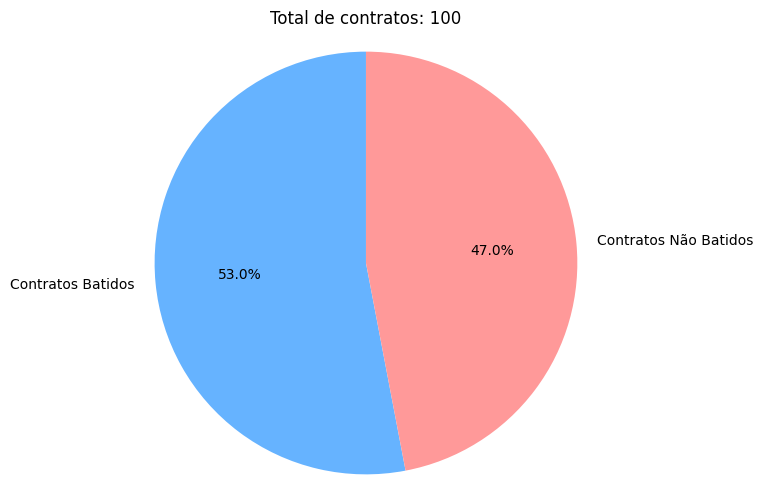

In [442]:
import matplotlib.pyplot as plt

# Exemplo de dados
total_contratos = len(contratos_comprasnet['id'].unique())  # Total de contratos
total_batidos = len(list_contr_batidos_comprasnet_tesouro)     # Contratos batidos
total_nao_batidos = len (contratos_nao_batidos)  # Contratos não batidos

# Preparando os dados para o gráfico
labels = ['Contratos Batidos', 'Contratos Não Batidos']
sizes = [total_batidos, total_nao_batidos]
colors = ['#66b3ff', '#ff9999']

# Criando o gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title(f'Total de contratos: {total_contratos}')
plt.axis('equal')  # Assegura que o gráfico seja desenhado como um círculo

# Exibindo o gráfico
plt.show()
